# **Integrated PreNATAL Care**

*ML Course Project*

1.   Mohammad Sufyan Azam
2.   Aamleen Ahmed
3.   Mohammad Shariq

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive
%cd ML_Project

/content/gdrive/MyDrive
/content/gdrive/MyDrive/ML_Project


# Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('fetal_CTG_dataset.csv')
df

FileName       Date      SegFile       b       e    LBE     LB   AC  \
0              NaN        NaN          NaN     NaN     NaN    NaN    NaN  NaN   
1     Variab10.txt  12/1/1996  CTG0001.txt   240.0   357.0  120.0  120.0  0.0   
2       Fmcs_1.txt   5/3/1996  CTG0002.txt     5.0   632.0  132.0  132.0  4.0   
3       Fmcs_1.txt   5/3/1996  CTG0003.txt   177.0   779.0  133.0  133.0  2.0   
4       Fmcs_1.txt   5/3/1996  CTG0004.txt   411.0  1192.0  134.0  134.0  2.0   
...            ...        ...          ...     ...     ...    ...    ...  ...   
2125  S8001045.dsp   6/6/1998  CTG2127.txt  1576.0  3049.0  140.0  140.0  1.0   
2126  S8001045.dsp   6/6/1998  CTG2128.txt  2796.0  3415.0  142.0  142.0  1.0   
2127           NaN        NaN          NaN     NaN     NaN    NaN    NaN  NaN   
2128           NaN        NaN          NaN     NaN     NaN    NaN    NaN  NaN   
2129           NaN        NaN          NaN     NaN     NaN    NaN    NaN  NaN   

         FM    UC  ...    C    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
0       NaN   NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN  NaN  
1       0.0   0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
2       0.0   4.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3       0.0   5.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4       0.0   6.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
...     ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...    ...  ...  
2125    0.0   9.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2126    1.0   5.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    1.0  1.0  
2127    NaN   NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN  NaN  
2128    NaN   NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN  NaN  
2129  564.0  23.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN  NaN  

[2130 rows x 40 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-null   floa

# PreProcessing Data

## Outliers & Null_Values & Other Analysis



1.   Checking Null Value
2.   Handling Columns
3.   Handling Outliers

#### Printing Dataset Headers

In [ ]:
i = 1
for name in list(df.columns):
    print(f'{i}.', name)
    i += 1

1. FileName
2. Date
3. SegFile
4. b
5. e
6. LBE
7. LB
8. AC
9. FM
10. UC
11. ASTV
12. MSTV
13. ALTV
14. MLTV
15. DL
16. DS
17. DP
18. DR
19. Width
20. Min
21. Max
22. Nmax
23. Nzeros
24. Mode
25. Mean
26. Median
27. Variance
28. Tendency
29. A
30. B
31. C
32. D
33. E
34. AD
35. DE
36. LD
37. FS
38. SUSP
39. CLASS
40. NSP


#### Checking and Removing Null Values

In [ ]:
# Checking for null values
df.isna().sum(axis=0)

FileName    4
Date        4
SegFile     4
b           4
e           4
LBE         4
LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
DR          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
A           4
B           4
C           4
D           4
E           4
AD          4
DE          4
LD          4
FS          4
SUSP        4
CLASS       4
NSP         4
dtype: int64

In [ ]:
# Removing null value rows
df = df.dropna(how='any',axis=0)
df

FileName       Date      SegFile       b       e    LBE     LB   AC  \
1     Variab10.txt  12/1/1996  CTG0001.txt   240.0   357.0  120.0  120.0  0.0   
2       Fmcs_1.txt   5/3/1996  CTG0002.txt     5.0   632.0  132.0  132.0  4.0   
3       Fmcs_1.txt   5/3/1996  CTG0003.txt   177.0   779.0  133.0  133.0  2.0   
4       Fmcs_1.txt   5/3/1996  CTG0004.txt   411.0  1192.0  134.0  134.0  2.0   
5       Fmcs_1.txt   5/3/1996  CTG0005.txt   533.0  1147.0  132.0  132.0  4.0   
...            ...        ...          ...     ...     ...    ...    ...  ...   
2122  S8001045.dsp   6/6/1998  CTG2124.txt  2059.0  2867.0  140.0  140.0  0.0   
2123  S8001045.dsp   6/6/1998  CTG2125.txt  1576.0  2867.0  140.0  140.0  1.0   
2124  S8001045.dsp   6/6/1998  CTG2126.txt  1576.0  2596.0  140.0  140.0  1.0   
2125  S8001045.dsp   6/6/1998  CTG2127.txt  1576.0  3049.0  140.0  140.0  1.0   
2126  S8001045.dsp   6/6/1998  CTG2128.txt  2796.0  3415.0  142.0  142.0  1.0   

       FM   UC  ...    C    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
1     0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
2     0.0  4.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3     0.0  5.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4     0.0  6.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
5     0.0  5.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...    ...  ...  
2122  0.0  6.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2123  0.0  9.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2124  0.0  7.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2125  0.0  9.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2126  1.0  5.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    1.0  1.0  

[2126 rows x 40 columns]

In [ ]:
# Dropping FileName, Date and SegFile
df = df.drop(df.columns[[0, 1, 2]], axis=1)
df

b       e    LBE     LB   AC   FM   UC  ASTV  MSTV  ALTV  ...    C  \
1      240.0   357.0  120.0  120.0  0.0  0.0  0.0  73.0   0.5  43.0  ...  0.0   
2        5.0   632.0  132.0  132.0  4.0  0.0  4.0  17.0   2.1   0.0  ...  0.0   
3      177.0   779.0  133.0  133.0  2.0  0.0  5.0  16.0   2.1   0.0  ...  0.0   
4      411.0  1192.0  134.0  134.0  2.0  0.0  6.0  16.0   2.4   0.0  ...  0.0   
5      533.0  1147.0  132.0  132.0  4.0  0.0  5.0  16.0   2.4   0.0  ...  0.0   
...      ...     ...    ...    ...  ...  ...  ...   ...   ...   ...  ...  ...   
2122  2059.0  2867.0  140.0  140.0  0.0  0.0  6.0  79.0   0.2  25.0  ...  0.0   
2123  1576.0  2867.0  140.0  140.0  1.0  0.0  9.0  78.0   0.4  22.0  ...  0.0   
2124  1576.0  2596.0  140.0  140.0  1.0  0.0  7.0  79.0   0.4  20.0  ...  0.0   
2125  1576.0  3049.0  140.0  140.0  1.0  0.0  9.0  78.0   0.4  27.0  ...  0.0   
2126  2796.0  3415.0  142.0  142.0  1.0  1.0  5.0  74.0   0.4  36.0  ...  0.0   

        D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
1     0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
2     0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3     0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4     0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
5     0.0  0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0  
...   ...  ...  ...  ...  ...  ...   ...    ...  ...  
2122  0.0  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2123  0.0  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2124  0.0  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2125  0.0  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2126  0.0  0.0  0.0  0.0  0.0  0.0   0.0    1.0  1.0  

[2126 rows x 37 columns]

In [ ]:
i = 1
for name in list(df.columns):
    print(f'{i}.', name)
    i += 1

1. b
2. e
3. LBE
4. LB
5. AC
6. FM
7. UC
8. ASTV
9. MSTV
10. ALTV
11. MLTV
12. DL
13. DS
14. DP
15. DR
16. Width
17. Min
18. Max
19. Nmax
20. Nzeros
21. Mode
22. Mean
23. Median
24. Variance
25. Tendency
26. A
27. B
28. C
29. D
30. E
31. AD
32. DE
33. LD
34. FS
35. SUSP
36. CLASS
37. NSP


#### Changing Coloumn Headers

In [ ]:
new_col_names = {
"b": "start_instant",
"e": "end_instant",
"LBE": "baseline_value_expert",
"LB": "baseline_value_SisPorto",
"AC": "accelerations_SisPorto",
"FM": "foetal_movement_SisPorto",
"UC": "uterine_contractions_SisPorto",
"ASTV": "abnormal_short_term_var_SisPorto",
"MSTV": "mean_short_term_var_SisPorto",
"ALTV": "abnormal_long_term_var_SisPorto",
"MLTV": "mean_long_term_var_SisPorto",
"DL": "light_decelerations",
"DS": "severe_decelerations",
"DP": "prolongued_decelerations",
"DR": "repetitive_decelerations",
"Width": "histogram_width",
"Min": "low_freq_histogram",
"Max": "high_freq_histogram",
"Nmax": "total_histogram_peaks",
"Nzeros": "total_histogram_zeros",
"Mode": "histogram_mode",
"Mean": "histogram_mean",
"Median": "histogram_median",
"Variance": "histogram_variance",
"Tendency": "histogram_tendency",
"A": "calm_sleep",
"B": "REM_sleep",
"C": "calm_vigilance",
"D": "active_vigilance",
"E": "E",
"SH": "shift_pattern",
"AD": "accel/decel_pattern_stress",
"DE": "decelerative_pattern_vagal",
"LD": "large_decelerative_pattern",
"FS": "flat_sinusoidal_pattern",
"SUSP": "suspect_pattern",
"CLASS": "class_code",
"NSP": "Output"
}
df = df.rename(columns = new_col_names)
df

start_instant  end_instant  baseline_value_expert  \
1             240.0        357.0                  120.0   
2               5.0        632.0                  132.0   
3             177.0        779.0                  133.0   
4             411.0       1192.0                  134.0   
5             533.0       1147.0                  132.0   
...             ...          ...                    ...   
2122         2059.0       2867.0                  140.0   
2123         1576.0       2867.0                  140.0   
2124         1576.0       2596.0                  140.0   
2125         1576.0       3049.0                  140.0   
2126         2796.0       3415.0                  142.0   

      baseline_value_SisPorto  accelerations_SisPorto  \
1                       120.0                     0.0   
2                       132.0                     4.0   
3                       133.0                     2.0   
4                       134.0                     2.0   
5                       132.0                     4.0   
...                       ...                     ...   
2122                    140.0                     0.0   
2123                    140.0                     1.0   
2124                    140.0                     1.0   
2125                    140.0                     1.0   
2126                    142.0                     1.0   

      foetal_movement_SisPorto  uterine_contractions_SisPorto  \
1                          0.0                            0.0   
2                          0.0                            4.0   
3                          0.0                            5.0   
4                          0.0                            6.0   
5                          0.0                            5.0   
...                        ...                            ...   
2122                       0.0                            6.0   
2123                       0.0                            9.0   
2124                       0.0                            7.0   
2125                       0.0                            9.0   
2126                       1.0                            5.0   

      abnormal_short_term_var_SisPorto  mean_short_term_var_SisPorto  \
1                                 73.0                           0.5   
2                                 17.0                           2.1   
3                                 16.0                           2.1   
4                                 16.0                           2.4   
5                                 16.0                           2.4   
...                                ...                           ...   
2122                              79.0                           0.2   
2123                              78.0                           0.4   
2124                              79.0                           0.4   
2125                              78.0                           0.4   
2126                              74.0                           0.4   

      abnormal_long_term_var_SisPorto  ...  calm_vigilance  active_vigilance  \
1                                43.0  ...             0.0               0.0   
2                                 0.0  ...             0.0               0.0   
3                                 0.0  ...             0.0               0.0   
4                                 0.0  ...             0.0               0.0   
5                                 0.0  ...             0.0               0.0   
...                               ...  ...             ...               ...   
2122                             25.0  ...             0.0               0.0   
2123                             22.0  ...             0.0               0.0   
2124                             20.0  ...             0.0               0.0   
2125                             27.0  ...             0.0               0.0   
2126                             36.0  ...             0.0               0.0   

     

## Checking and removing outliers

#### Box plot for checking outliers

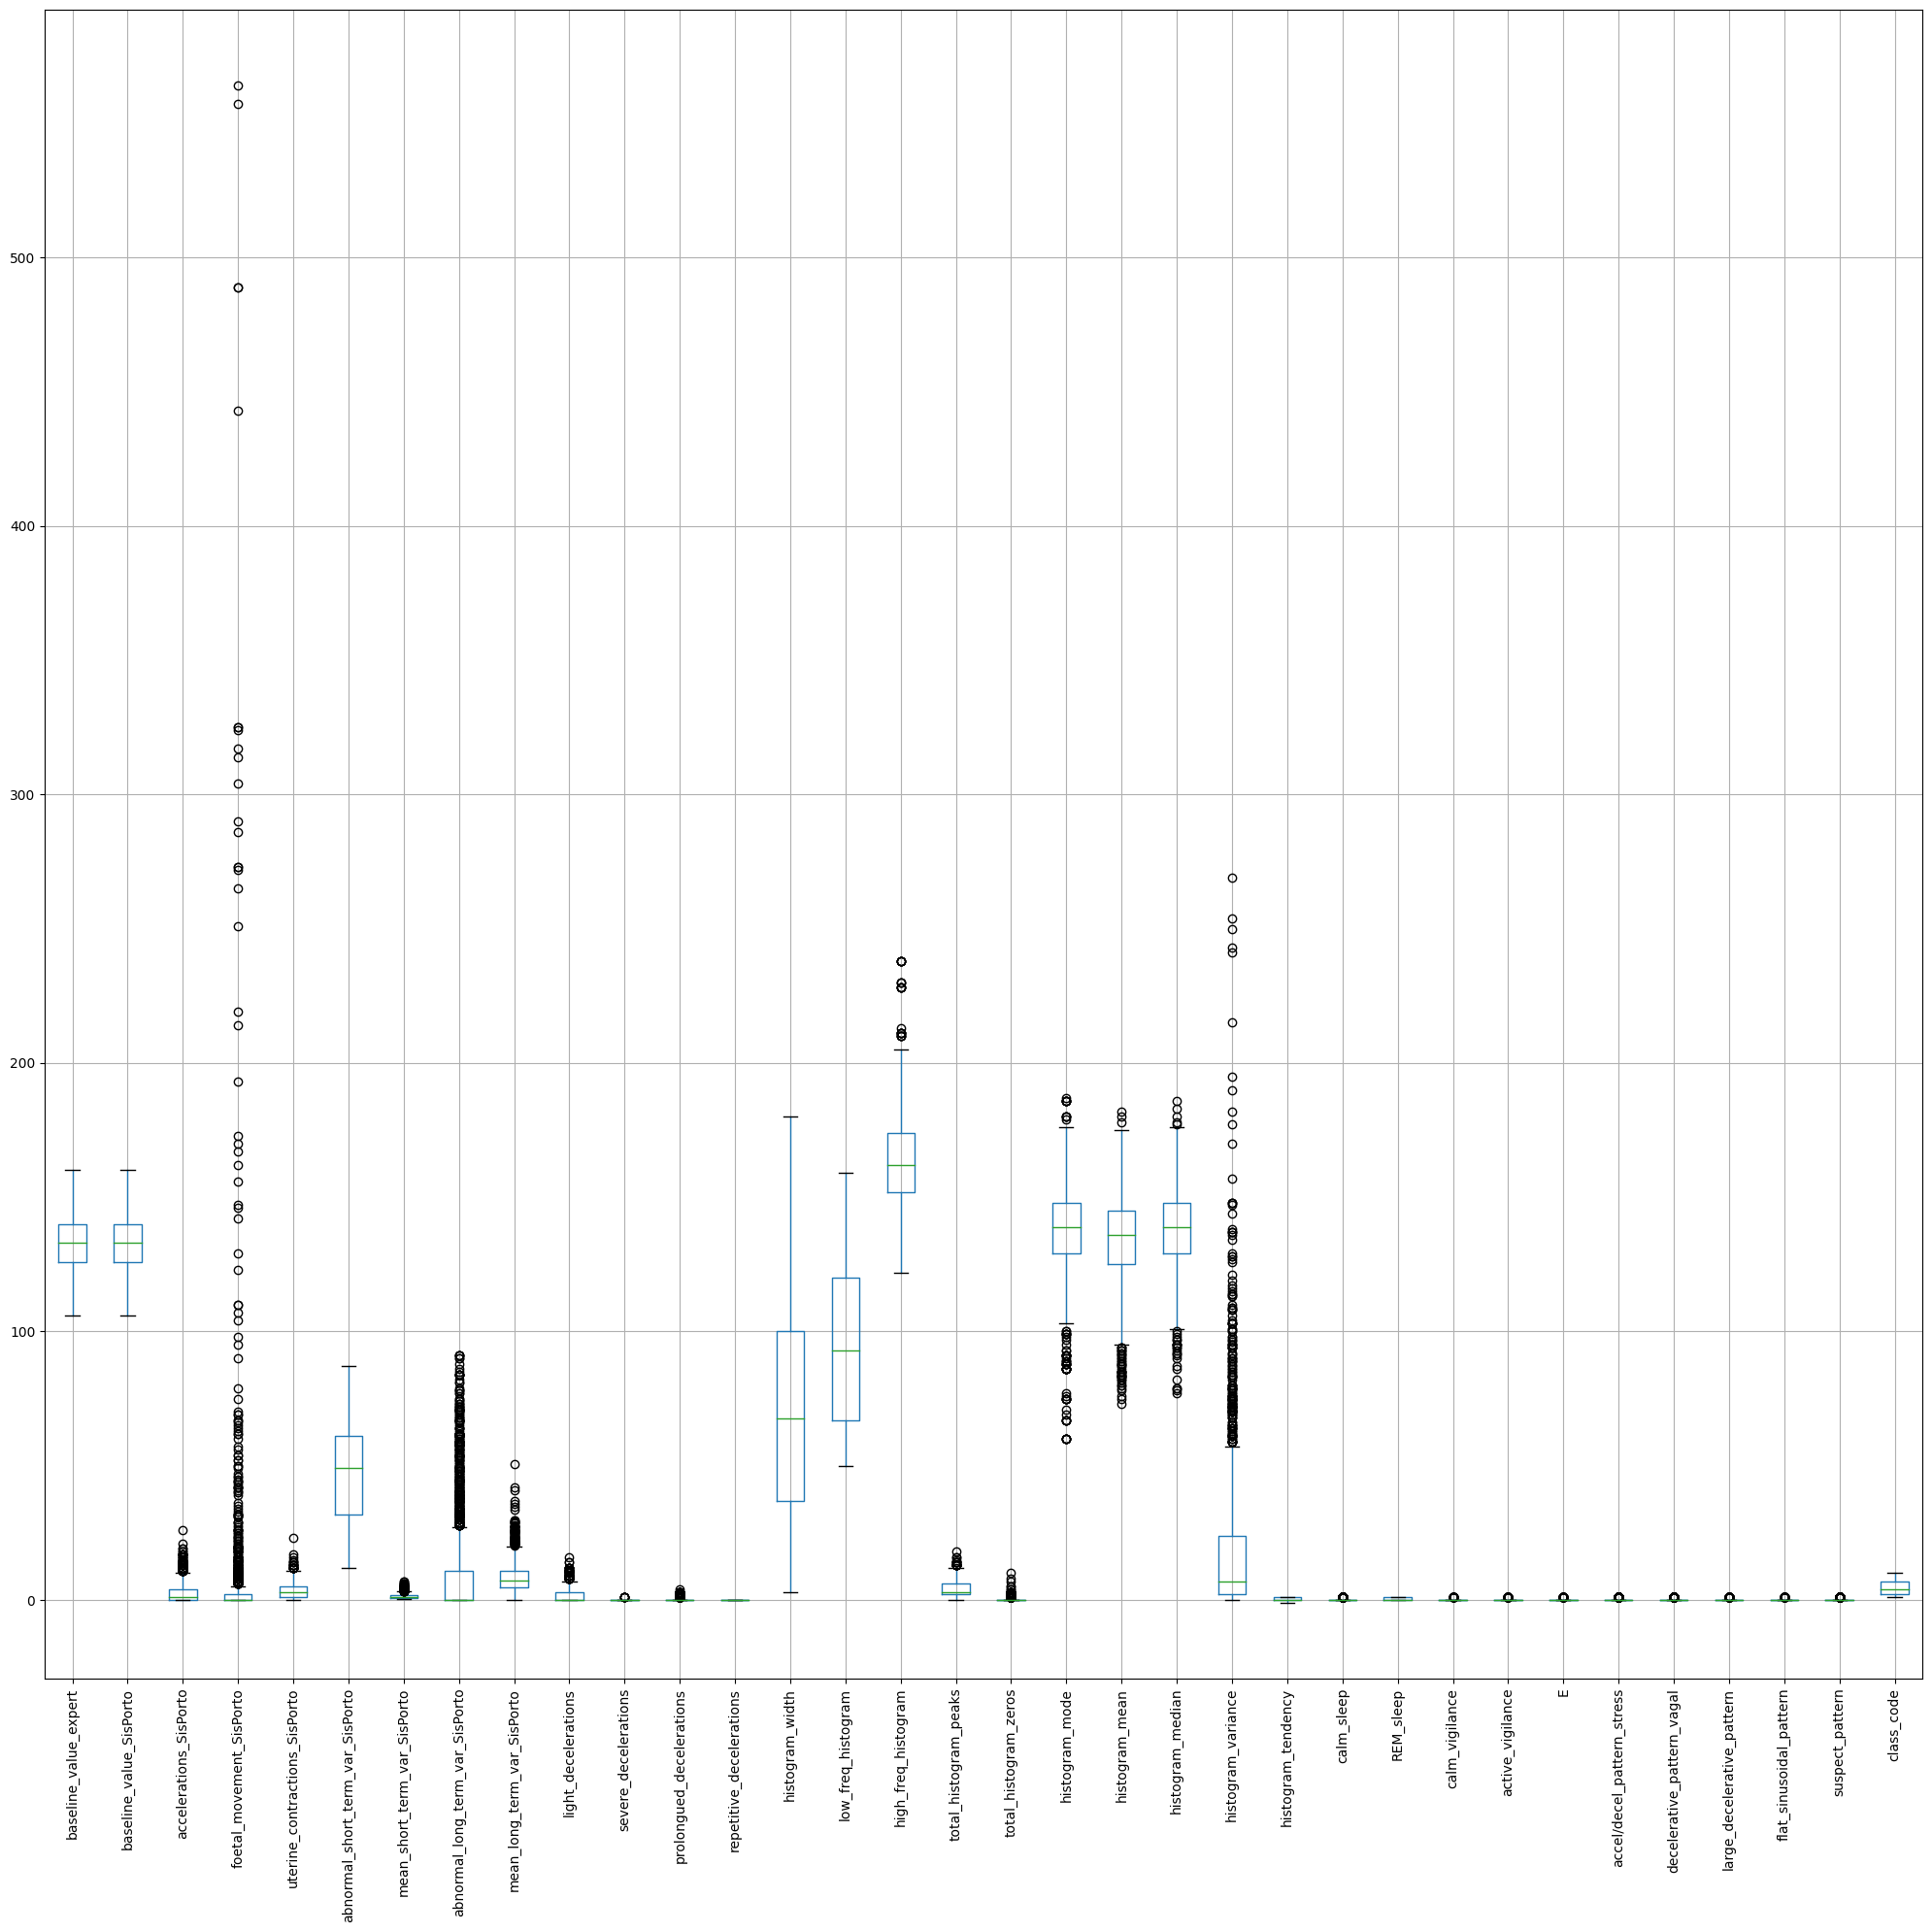

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
box1 = df.drop(['start_instant',	'end_instant', 'Output'], axis=1)
box1.boxplot(ax=ax, rot=90, showfliers=True)
plt.tight_layout()
plt.show()

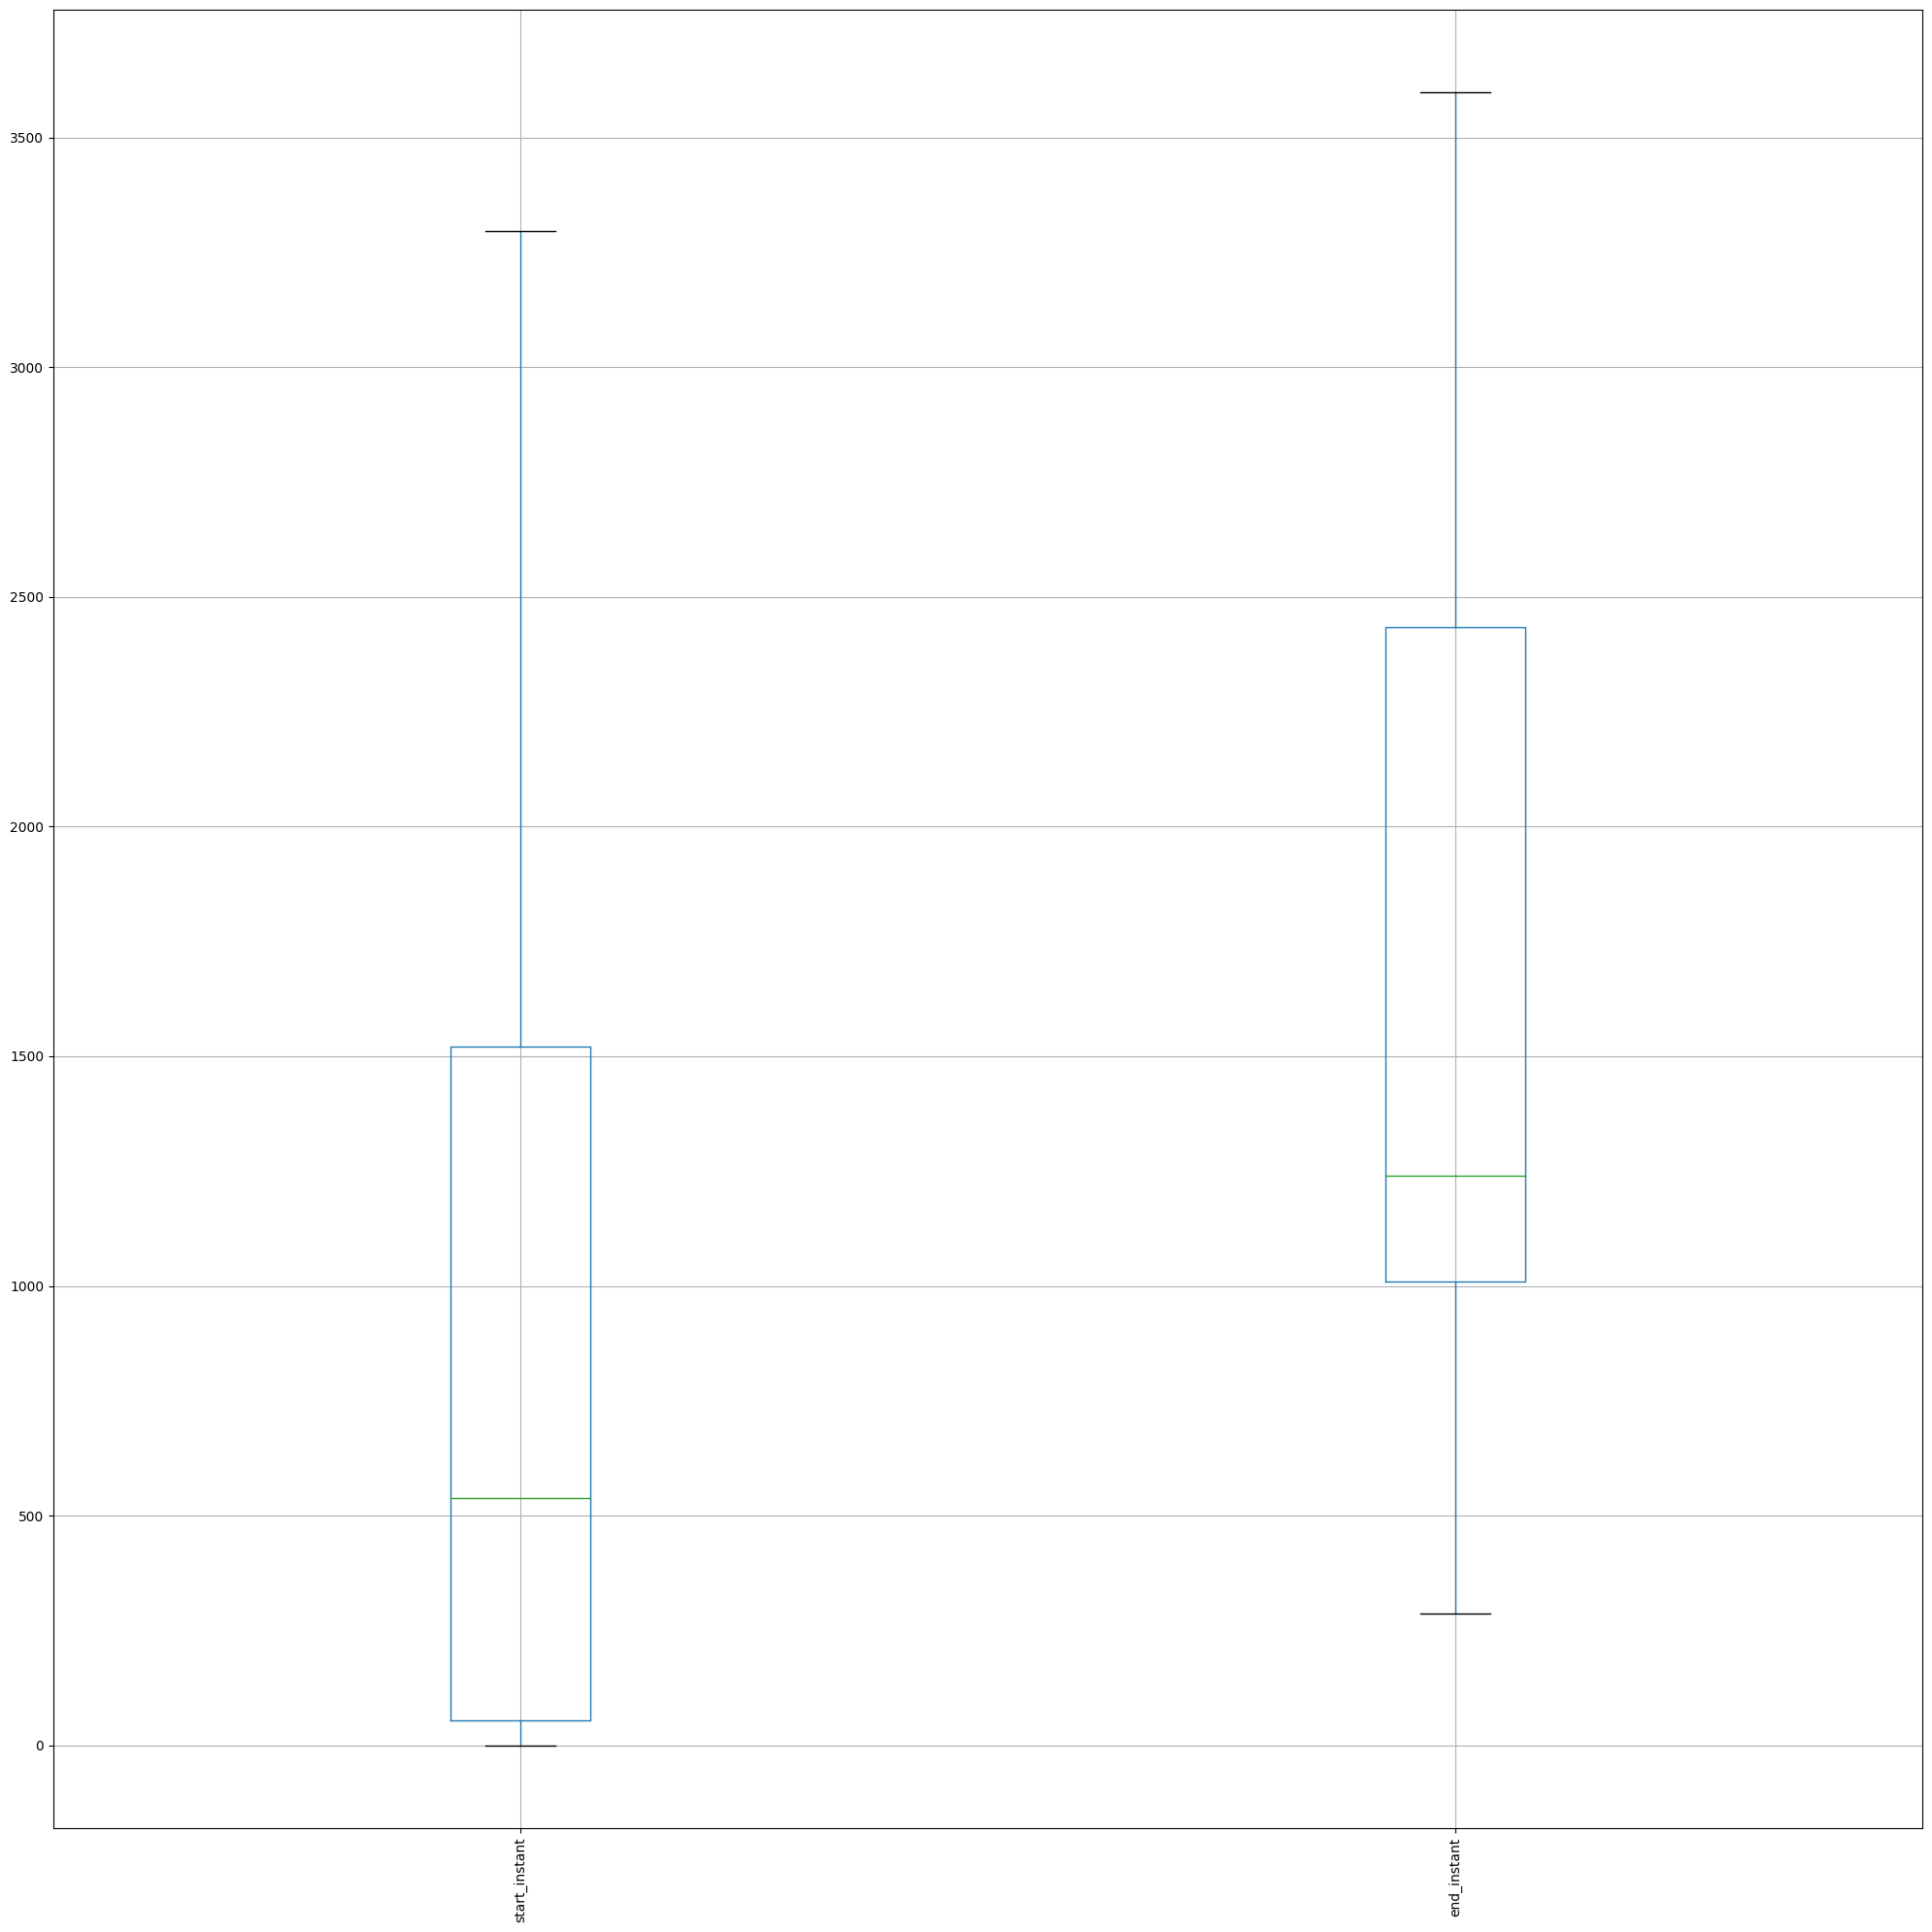

In [ ]:
# threshold = {
# "accelerations_SisPorto": 3,
# "foetal_movement_SisPorto": 2,
# "uterine_contractions_SisPorto": 3,
# "mean_short_term_var_SisPorto": 2,
# "abnormal_long_term_var_SisPorto": ,
# "mean_long_term_var_SisPorto": ,
# "light_decelerations": ,
# "severe_decelerations": ,
# "prolongued_decelerations": ,
# "high_freq_histogram": ,
# "total_histogram_peaks": ,
# "total_histogram_zeros": ,
# "histogram_mode": ,
# "histogram_mean": ,
# "histogram_median": ,
# "histogram_variance": ,
# "histogram_tendency": ,
# "calm_sleep": ,
# "REM_sleep": ,
# "calm_vigilance": ,
# "active_vigilance": ,
# "E": ,
# "accel/decel_pattern_stress": ,
# "decelerative_pattern_vagal": ,
# "large_decelerative_pattern": ,
# "flat_sinusoidal_pattern": ,
# "suspect_pattern": ,
# }


# Box plots for first two colummns
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
box2 = df[['start_instant', 'end_instant']]
box2.boxplot(ax=ax, rot=90, showfliers=True)
plt.tight_layout()
plt.show()

#### Z-Score

In [ ]:
# Removing outliers present in the data using z-score
from scipy import stats
df_outlier_z = df.copy(deep=True)
for col in df.columns:
    z_scores = np.abs(stats.zscore(df[col]))
    df_outlier_z[col] = df[col][(z_scores < 3)]
df_outlier_z

start_instant  end_instant  baseline_value_expert  \
1             240.0        357.0                  120.0   
2               5.0        632.0                  132.0   
3             177.0        779.0                  133.0   
4             411.0       1192.0                  134.0   
5             533.0       1147.0                  132.0   
...             ...          ...                    ...   
2122         2059.0       2867.0                  140.0   
2123         1576.0       2867.0                  140.0   
2124         1576.0       2596.0                  140.0   
2125         1576.0       3049.0                  140.0   
2126         2796.0       3415.0                  142.0   

      baseline_value_SisPorto  accelerations_SisPorto  \
1                       120.0                     0.0   
2                       132.0                     4.0   
3                       133.0                     2.0   
4                       134.0                     2.0   
5                       132.0                     4.0   
...                       ...                     ...   
2122                    140.0                     0.0   
2123                    140.0                     1.0   
2124                    140.0                     1.0   
2125                    140.0                     1.0   
2126                    142.0                     1.0   

      foetal_movement_SisPorto  uterine_contractions_SisPorto  \
1                          0.0                            0.0   
2                          0.0                            4.0   
3                          0.0                            5.0   
4                          0.0                            6.0   
5                          0.0                            5.0   
...                        ...                            ...   
2122                       0.0                            6.0   
2123                       0.0                            9.0   
2124                       0.0                            7.0   
2125                       0.0                            9.0   
2126                       1.0                            5.0   

      abnormal_short_term_var_SisPorto  mean_short_term_var_SisPorto  \
1                                 73.0                           0.5   
2                                 17.0                           2.1   
3                                 16.0                           2.1   
4                                 16.0                           2.4   
5                                 16.0                           2.4   
...                                ...                           ...   
2122                              79.0                           0.2   
2123                              78.0                           0.4   
2124                              79.0                           0.4   
2125                              78.0                           0.4   
2126                              74.0                           0.4   

      abnormal_long_term_var_SisPorto  ...  calm_vigilance  active_vigilance  \
1                                43.0  ...             0.0               0.0   
2                                 0.0  ...             0.0               0.0   
3                                 0.0  ...             0.0               0.0   
4                                 0.0  ...             0.0               0.0   
5                                 0.0  ...             0.0               0.0   
...                               ...  ...             ...               ...   
2122                             25.0  ...             0.0               0.0   
2123                             22.0  ...             0.0               0.0   
2124                             20.0  ...             0.0               0.0   
2125                             27.0  ...             0.0               0.0   
2126                             36.0  ...             0.0               0.0   

     

In [ ]:
df_outlier_z.isnull().sum(axis=0)
df_outlier_z = df_outlier_z.drop(["repetitive_decelerations"], axis=1)
df_outlier_z = df_outlier_z.dropna(how='any',axis=0)
df_outlier_z

start_instant  end_instant  baseline_value_expert  \
2               5.0        632.0                  132.0   
3             177.0        779.0                  133.0   
4             411.0       1192.0                  134.0   
5             533.0       1147.0                  132.0   
13             52.0        840.0                  131.0   
...             ...          ...                    ...   
2118          595.0       1363.0                  140.0   
2119          595.0       1677.0                  140.0   
2120          790.0       1677.0                  140.0   
2121         1143.0       1947.0                  140.0   
2126         2796.0       3415.0                  142.0   

      baseline_value_SisPorto  accelerations_SisPorto  \
2                       132.0                     4.0   
3                       133.0                     2.0   
4                       134.0                     2.0   
5                       132.0                     4.0   
13                      131.0                     4.0   
...                       ...                     ...   
2118                    140.0                     0.0   
2119                    140.0                     0.0   
2120                    140.0                     0.0   
2121                    140.0                     0.0   
2126                    142.0                     1.0   

      foetal_movement_SisPorto  uterine_contractions_SisPorto  \
2                          0.0                            4.0   
3                          0.0                            5.0   
4                          0.0                            6.0   
5                          0.0                            5.0   
13                        57.0                            6.0   
...                        ...                            ...   
2118                       0.0                            6.0   
2119                       0.0                            7.0   
2120                       0.0                            6.0   
2121                       0.0                            4.0   
2126                       1.0                            5.0   

      abnormal_short_term_var_SisPorto  mean_short_term_var_SisPorto  \
2                                 17.0                           2.1   
3                                 16.0                           2.1   
4                                 16.0                           2.4   
5                                 16.0                           2.4   
13                                28.0                           1.4   
...                                ...                           ...   
2118                              79.0                           0.3   
2119                              79.0                           0.5   
2120                              79.0                           0.6   
2121                              77.0                           0.7   
2126                              74.0                           0.4   

      abnormal_long_term_var_SisPorto  ...  calm_vigilance  active_vigilance  \
2                                 0.0  ...             0.0               0.0   
3                                 0.0  ...             0.0               0.0   
4                                 0.0  ...             0.0               0.0   
5                                 0.0  ...             0.0               0.0   
13                                0.0  ...             0.0               0.0   
...                               ...  ...             ...               ...   
2118                             20.0  ...             0.0               0.0   
2119                             26.0  ...             0.0               0.0   
2120                             27.0  ...             0.0               0.0   
2121                             17.0  ...             0.0               0.0   
2126                             36.0  ...             0.0               0.0   

     

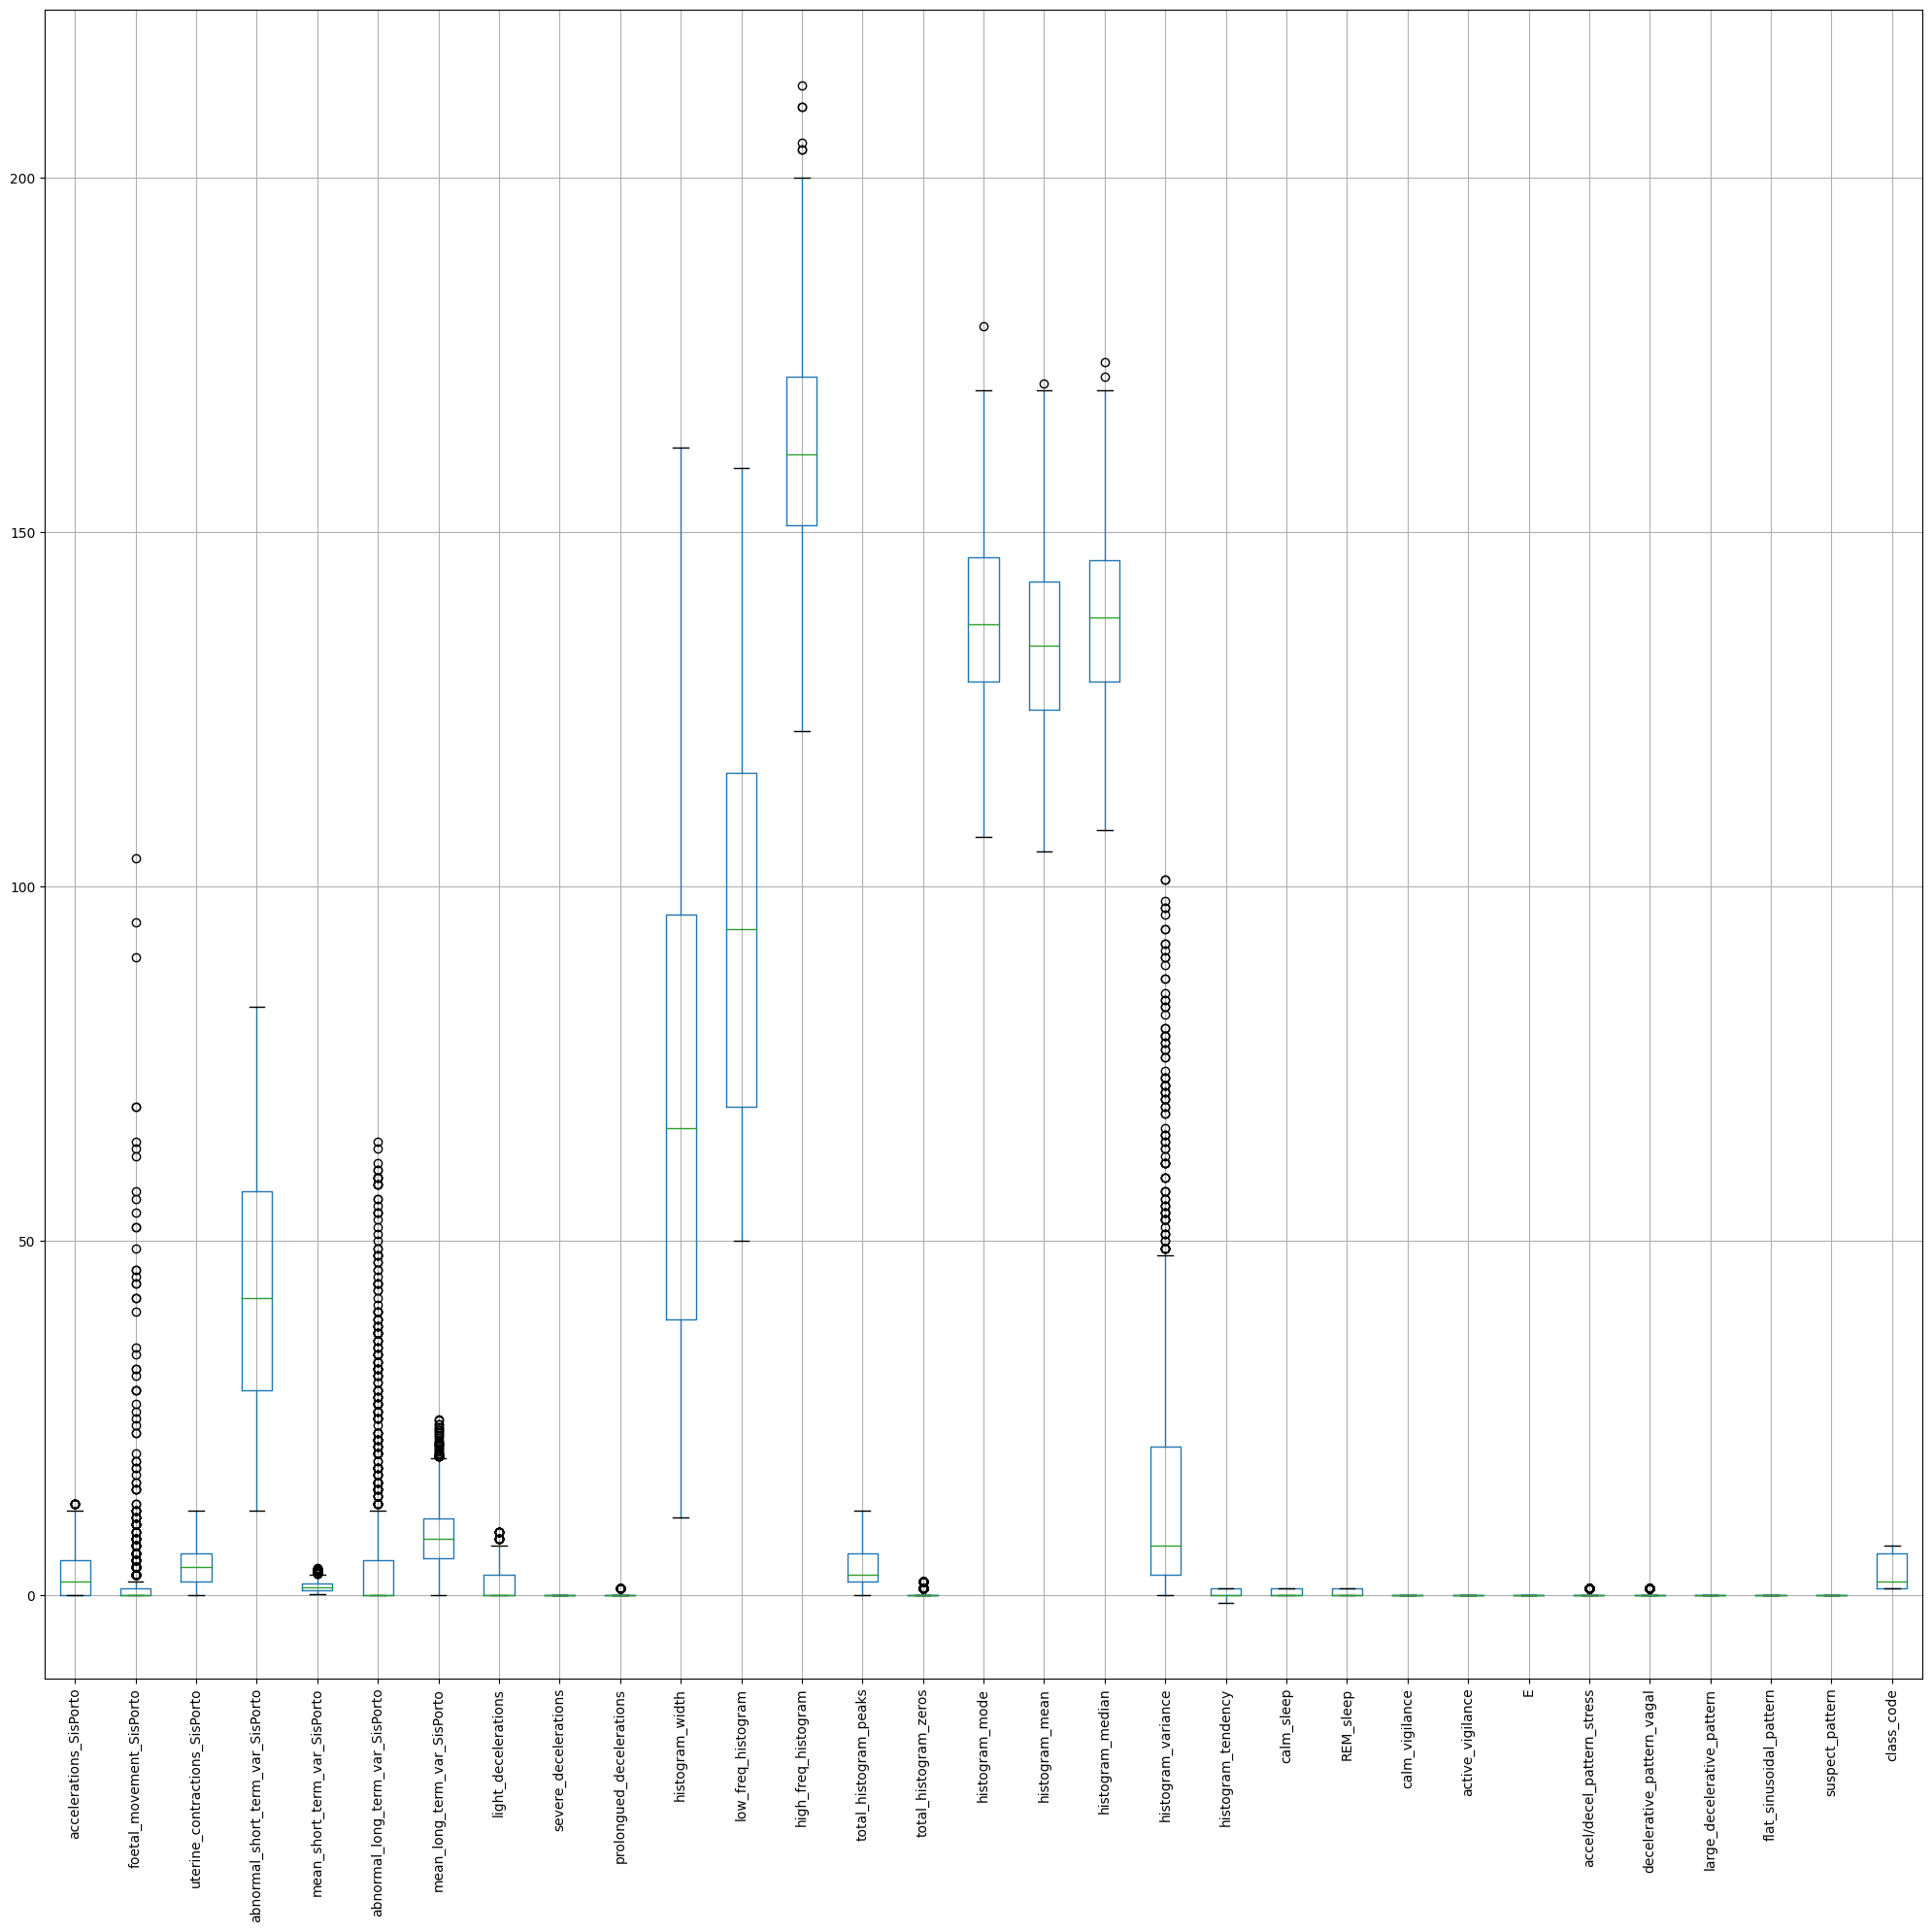

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
box3 = df_outlier_z.drop(['start_instant', 'end_instant', 'baseline_value_expert', 'baseline_value_SisPorto', 'Output'], axis=1)
box3.boxplot(ax=ax, rot=90, showfliers=True)
plt.tight_layout()
plt.show()

#### KNN Imputer

In [ ]:
# Removing Outliers Present in the Data using substitution method - KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_outlier_z_knn = pd.DataFrame(imputer.fit_transform(df_outlier_z), columns = df_outlier_z.columns)
df_outlier_z_knn

start_instant  end_instant  baseline_value_expert  \
0               5.0        632.0                  132.0   
1             177.0        779.0                  133.0   
2             411.0       1192.0                  134.0   
3             533.0       1147.0                  132.0   
4              52.0        840.0                  131.0   
...             ...          ...                    ...   
1374          595.0       1363.0                  140.0   
1375          595.0       1677.0                  140.0   
1376          790.0       1677.0                  140.0   
1377         1143.0       1947.0                  140.0   
1378         2796.0       3415.0                  142.0   

      baseline_value_SisPorto  accelerations_SisPorto  \
0                       132.0                     4.0   
1                       133.0                     2.0   
2                       134.0                     2.0   
3                       132.0                     4.0   
4                       131.0                     4.0   
...                       ...                     ...   
1374                    140.0                     0.0   
1375                    140.0                     0.0   
1376                    140.0                     0.0   
1377                    140.0                     0.0   
1378                    142.0                     1.0   

      foetal_movement_SisPorto  uterine_contractions_SisPorto  \
0                          0.0                            4.0   
1                          0.0                            5.0   
2                          0.0                            6.0   
3                          0.0                            5.0   
4                         57.0                            6.0   
...                        ...                            ...   
1374                       0.0                            6.0   
1375                       0.0                            7.0   
1376                       0.0                            6.0   
1377                       0.0                            4.0   
1378                       1.0                            5.0   

      abnormal_short_term_var_SisPorto  mean_short_term_var_SisPorto  \
0                                 17.0                           2.1   
1                                 16.0                           2.1   
2                                 16.0                           2.4   
3                                 16.0                           2.4   
4                                 28.0                           1.4   
...                                ...                           ...   
1374                              79.0                           0.3   
1375                              79.0                           0.5   
1376                              79.0                           0.6   
1377                              77.0                           0.7   
1378                              74.0                           0.4   

      abnormal_long_term_var_SisPorto  ...  calm_vigilance  active_vigilance  \
0                                 0.0  ...             0.0               0.0   
1                                 0.0  ...             0.0               0.0   
2                                 0.0  ...             0.0               0.0   
3                                 0.0  ...             0.0               0.0   
4                                 0.0  ...             0.0               0.0   
...                               ...  ...             ...               ...   
1374                             20.0  ...             0.0               0.0   
1375                             26.0  ...             0.0               0.0   
1376                             27.0  ...             0.0               0.0   
1377                             17.0  ...             0.0               0.0   
1378                             36.0  ...             0.0               0.0   

     

start_instant                       0
end_instant                         0
baseline_value_expert               0
baseline_value_SisPorto             0
accelerations_SisPorto              0
foetal_movement_SisPorto            0
uterine_contractions_SisPorto       0
abnormal_short_term_var_SisPorto    0
mean_short_term_var_SisPorto        0
abnormal_long_term_var_SisPorto     0
mean_long_term_var_SisPorto         0
light_decelerations                 0
severe_decelerations                0
prolongued_decelerations            0
histogram_width                     0
low_freq_histogram                  0
high_freq_histogram                 0
total_histogram_peaks               0
total_histogram_zeros               0
histogram_mode                      0
histogram_mean                      0
histogram_median                    0
histogram_variance                  0
histogram_tendency                  0
calm_sleep                          0
REM_sleep                           0
calm_vigilan

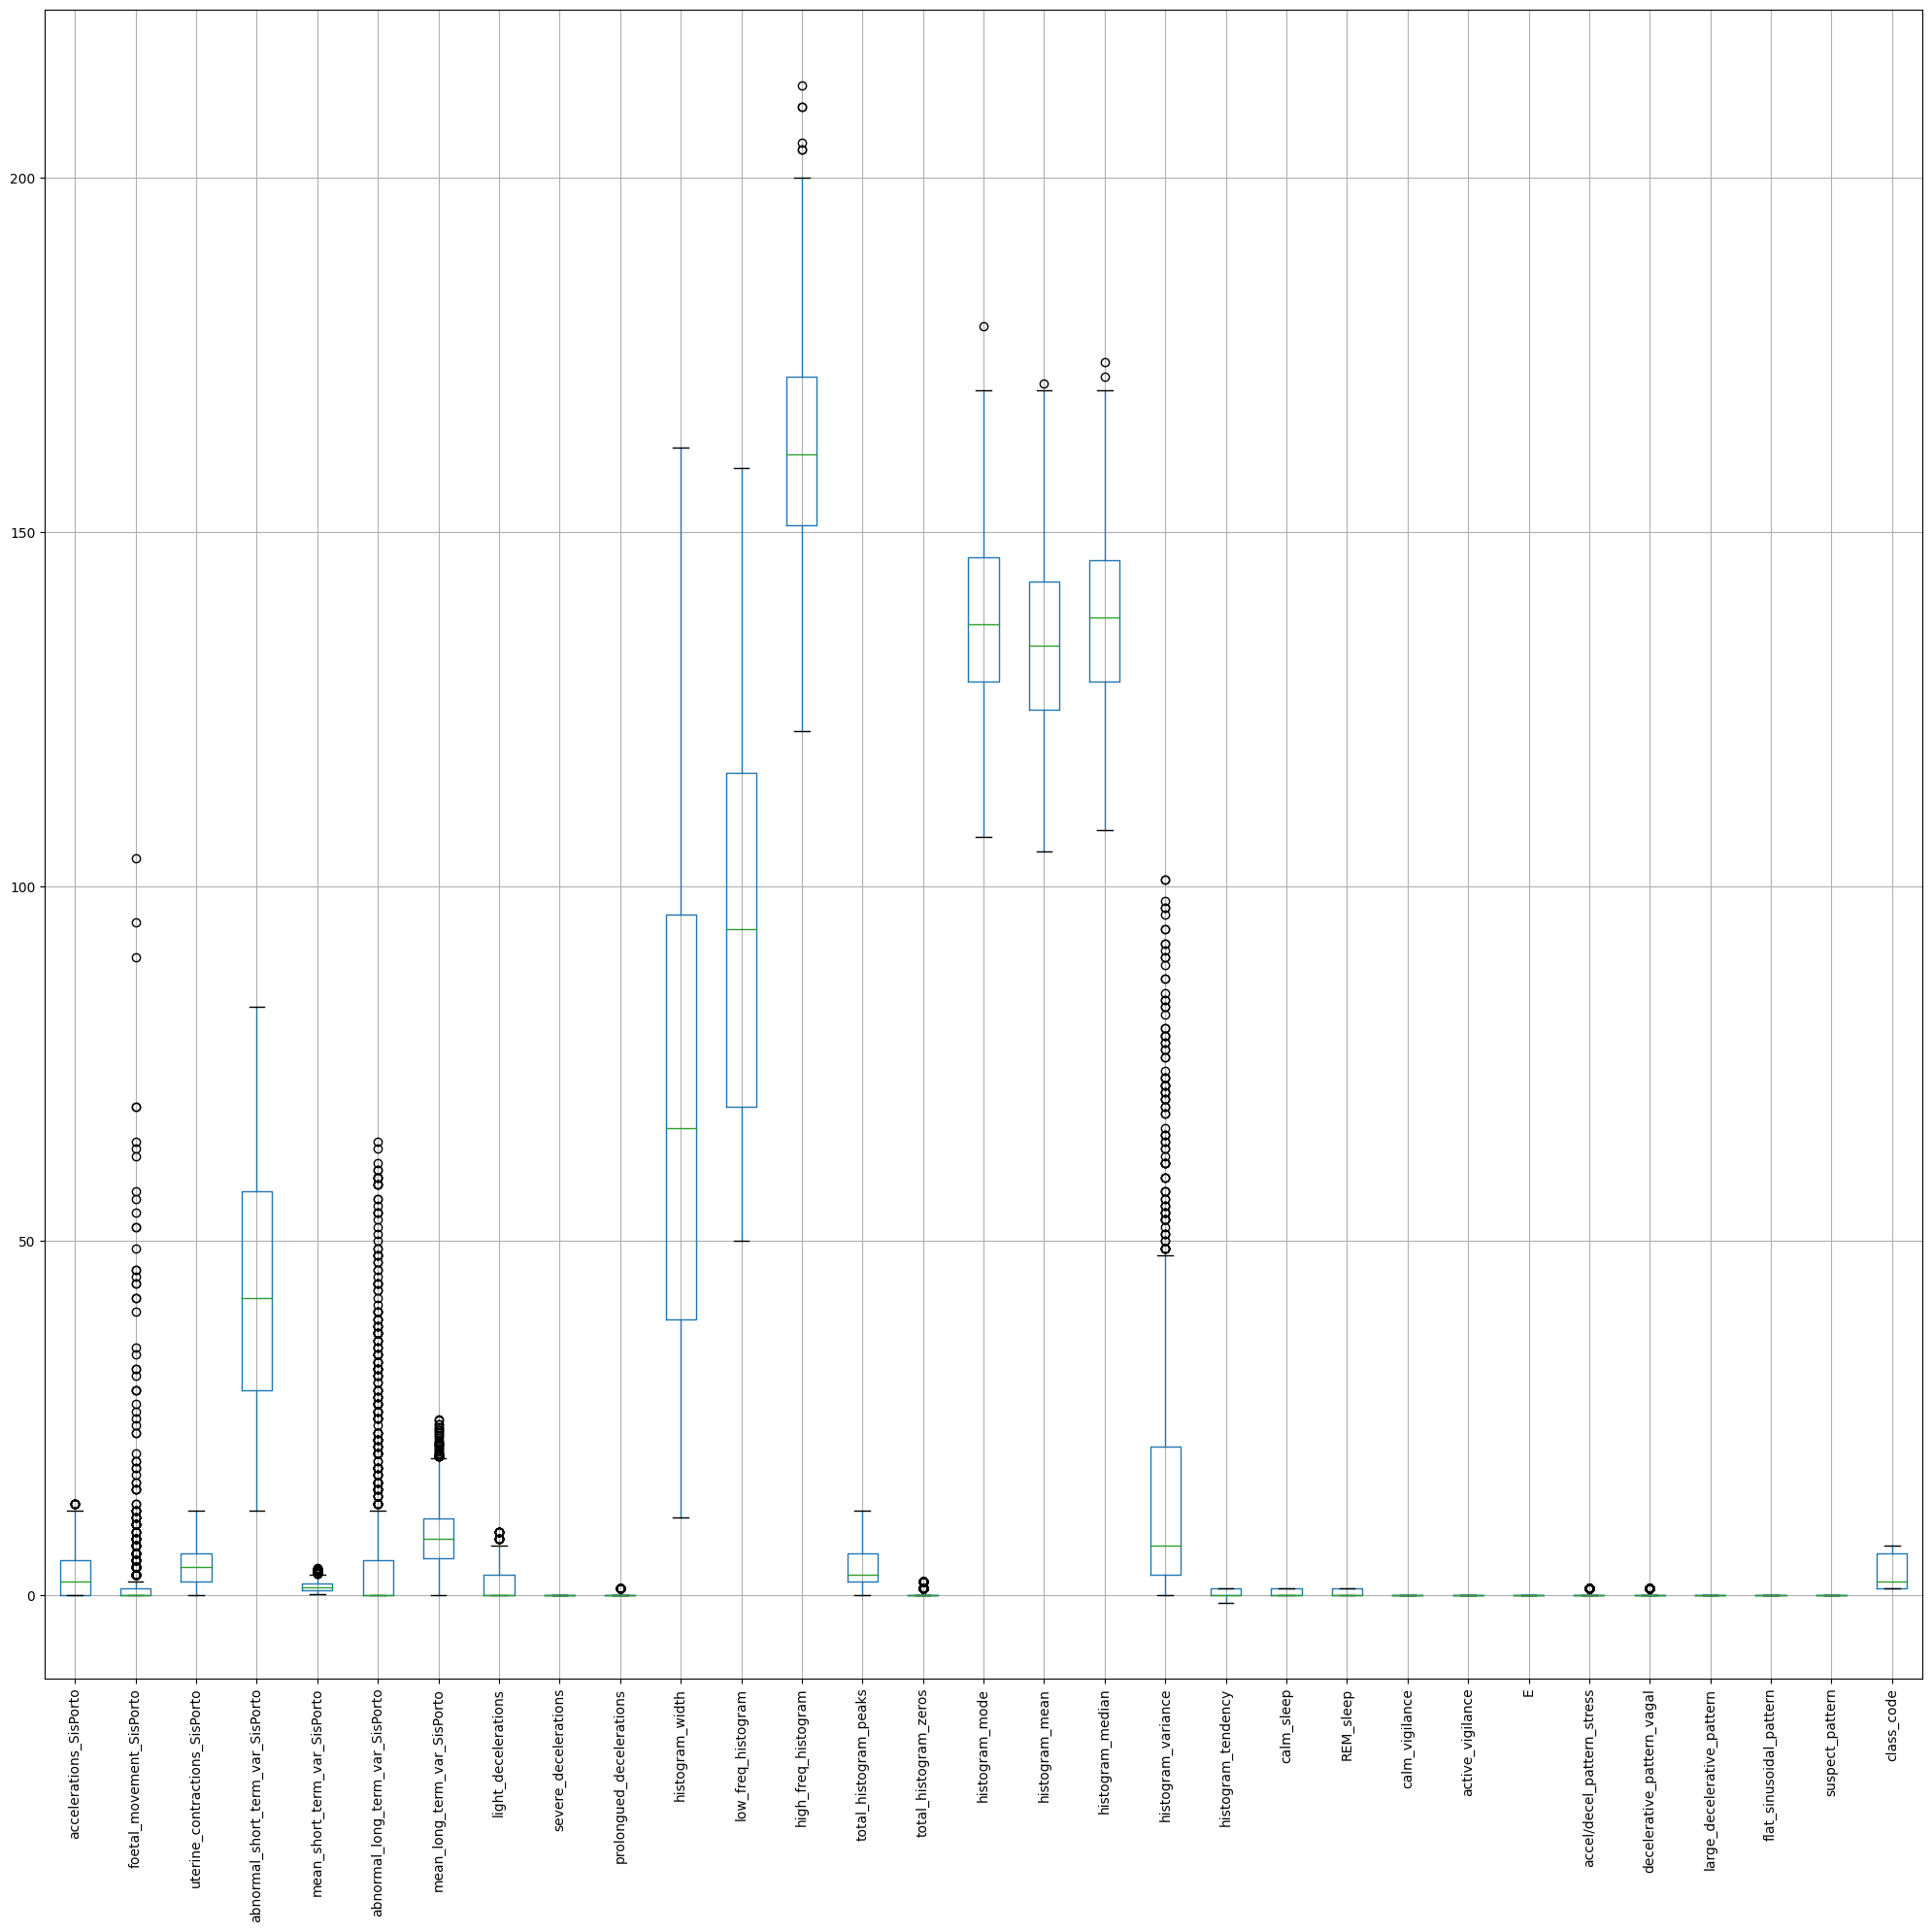

In [ ]:
print(df_outlier_z_knn.isnull().sum(axis=0))
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
box6 = df_outlier_z_knn.drop(['start_instant', 'end_instant', 'baseline_value_expert', 'baseline_value_SisPorto', 'Output'], axis=1)
box6.boxplot(ax=ax, rot=90, showfliers=True)
plt.tight_layout()
plt.show()

#### Inter Quartile Range

In [ ]:
# # Removing outliers present in the data using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# print(IQR)
df_outlier_iqr = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
df_outlier_iqr

start_instant  end_instant  baseline_value_expert  \
5             533.0       1147.0                  132.0   
50              0.0       1199.0                  158.0   
51            449.0       1191.0                  158.0   
60            835.0       1449.0                  144.0   
61            477.0       1264.0                  146.0   
...             ...          ...                    ...   
2077         1134.0       2230.0                  130.0   
2078         1134.0       2308.0                  130.0   
2079         1264.0       2308.0                  130.0   
2080         1457.0       2308.0                  130.0   
2081         1457.0       2456.0                  130.0   

      baseline_value_SisPorto  accelerations_SisPorto  \
5                       132.0                     4.0   
50                      158.0                     6.0   
51                      158.0                     4.0   
60                      144.0                     5.0   
61                      146.0                     4.0   
...                       ...                     ...   
2077                    130.0                     6.0   
2078                    130.0                     6.0   
2079                    130.0                     5.0   
2080                    130.0                     3.0   
2081                    130.0                     3.0   

      foetal_movement_SisPorto  uterine_contractions_SisPorto  \
5                          0.0                            5.0   
50                         0.0                            9.0   
51                         0.0                            6.0   
60                         0.0                            4.0   
61                         0.0                            4.0   
...                        ...                            ...   
2077                       1.0                            1.0   
2078                       1.0                            1.0   
2079                       0.0                            1.0   
2080                       0.0                            1.0   
2081                       2.0                            1.0   

      abnormal_short_term_var_SisPorto  mean_short_term_var_SisPorto  \
5                                 16.0                           2.4   
50                                27.0                           1.7   
51                                29.0                           1.3   
60                                33.0                           1.1   
61                                39.0                           0.9   
...                                ...                           ...   
2077                              72.0                           0.9   
2078                              72.0                           0.9   
2079                              73.0                           0.6   
2080                              75.0                           0.6   
2081                              74.0                           1.3   

      abnormal_long_term_var_SisPorto  ...  calm_vigilance  active_vigilance  \
5                                 0.0  ...             0.0               0.0   
50                                0.0  ...             0.0               0.0   
51                                0.0  ...             0.0               0.0   
60                                0.0  ...             0.0               0.0   
61                               18.0  ...             0.0               0.0   
...                               ...  ...             ...               ...   
2077                              9.0  ...             0.0               0.0   
2078                              8.0  ...             0.0               0.0   
2079                              9.0  ...             0.0               0.0   
2080                             10.0  ...             0.0               0.0   
2081                              8.0  ...             0.0               0.0   

     

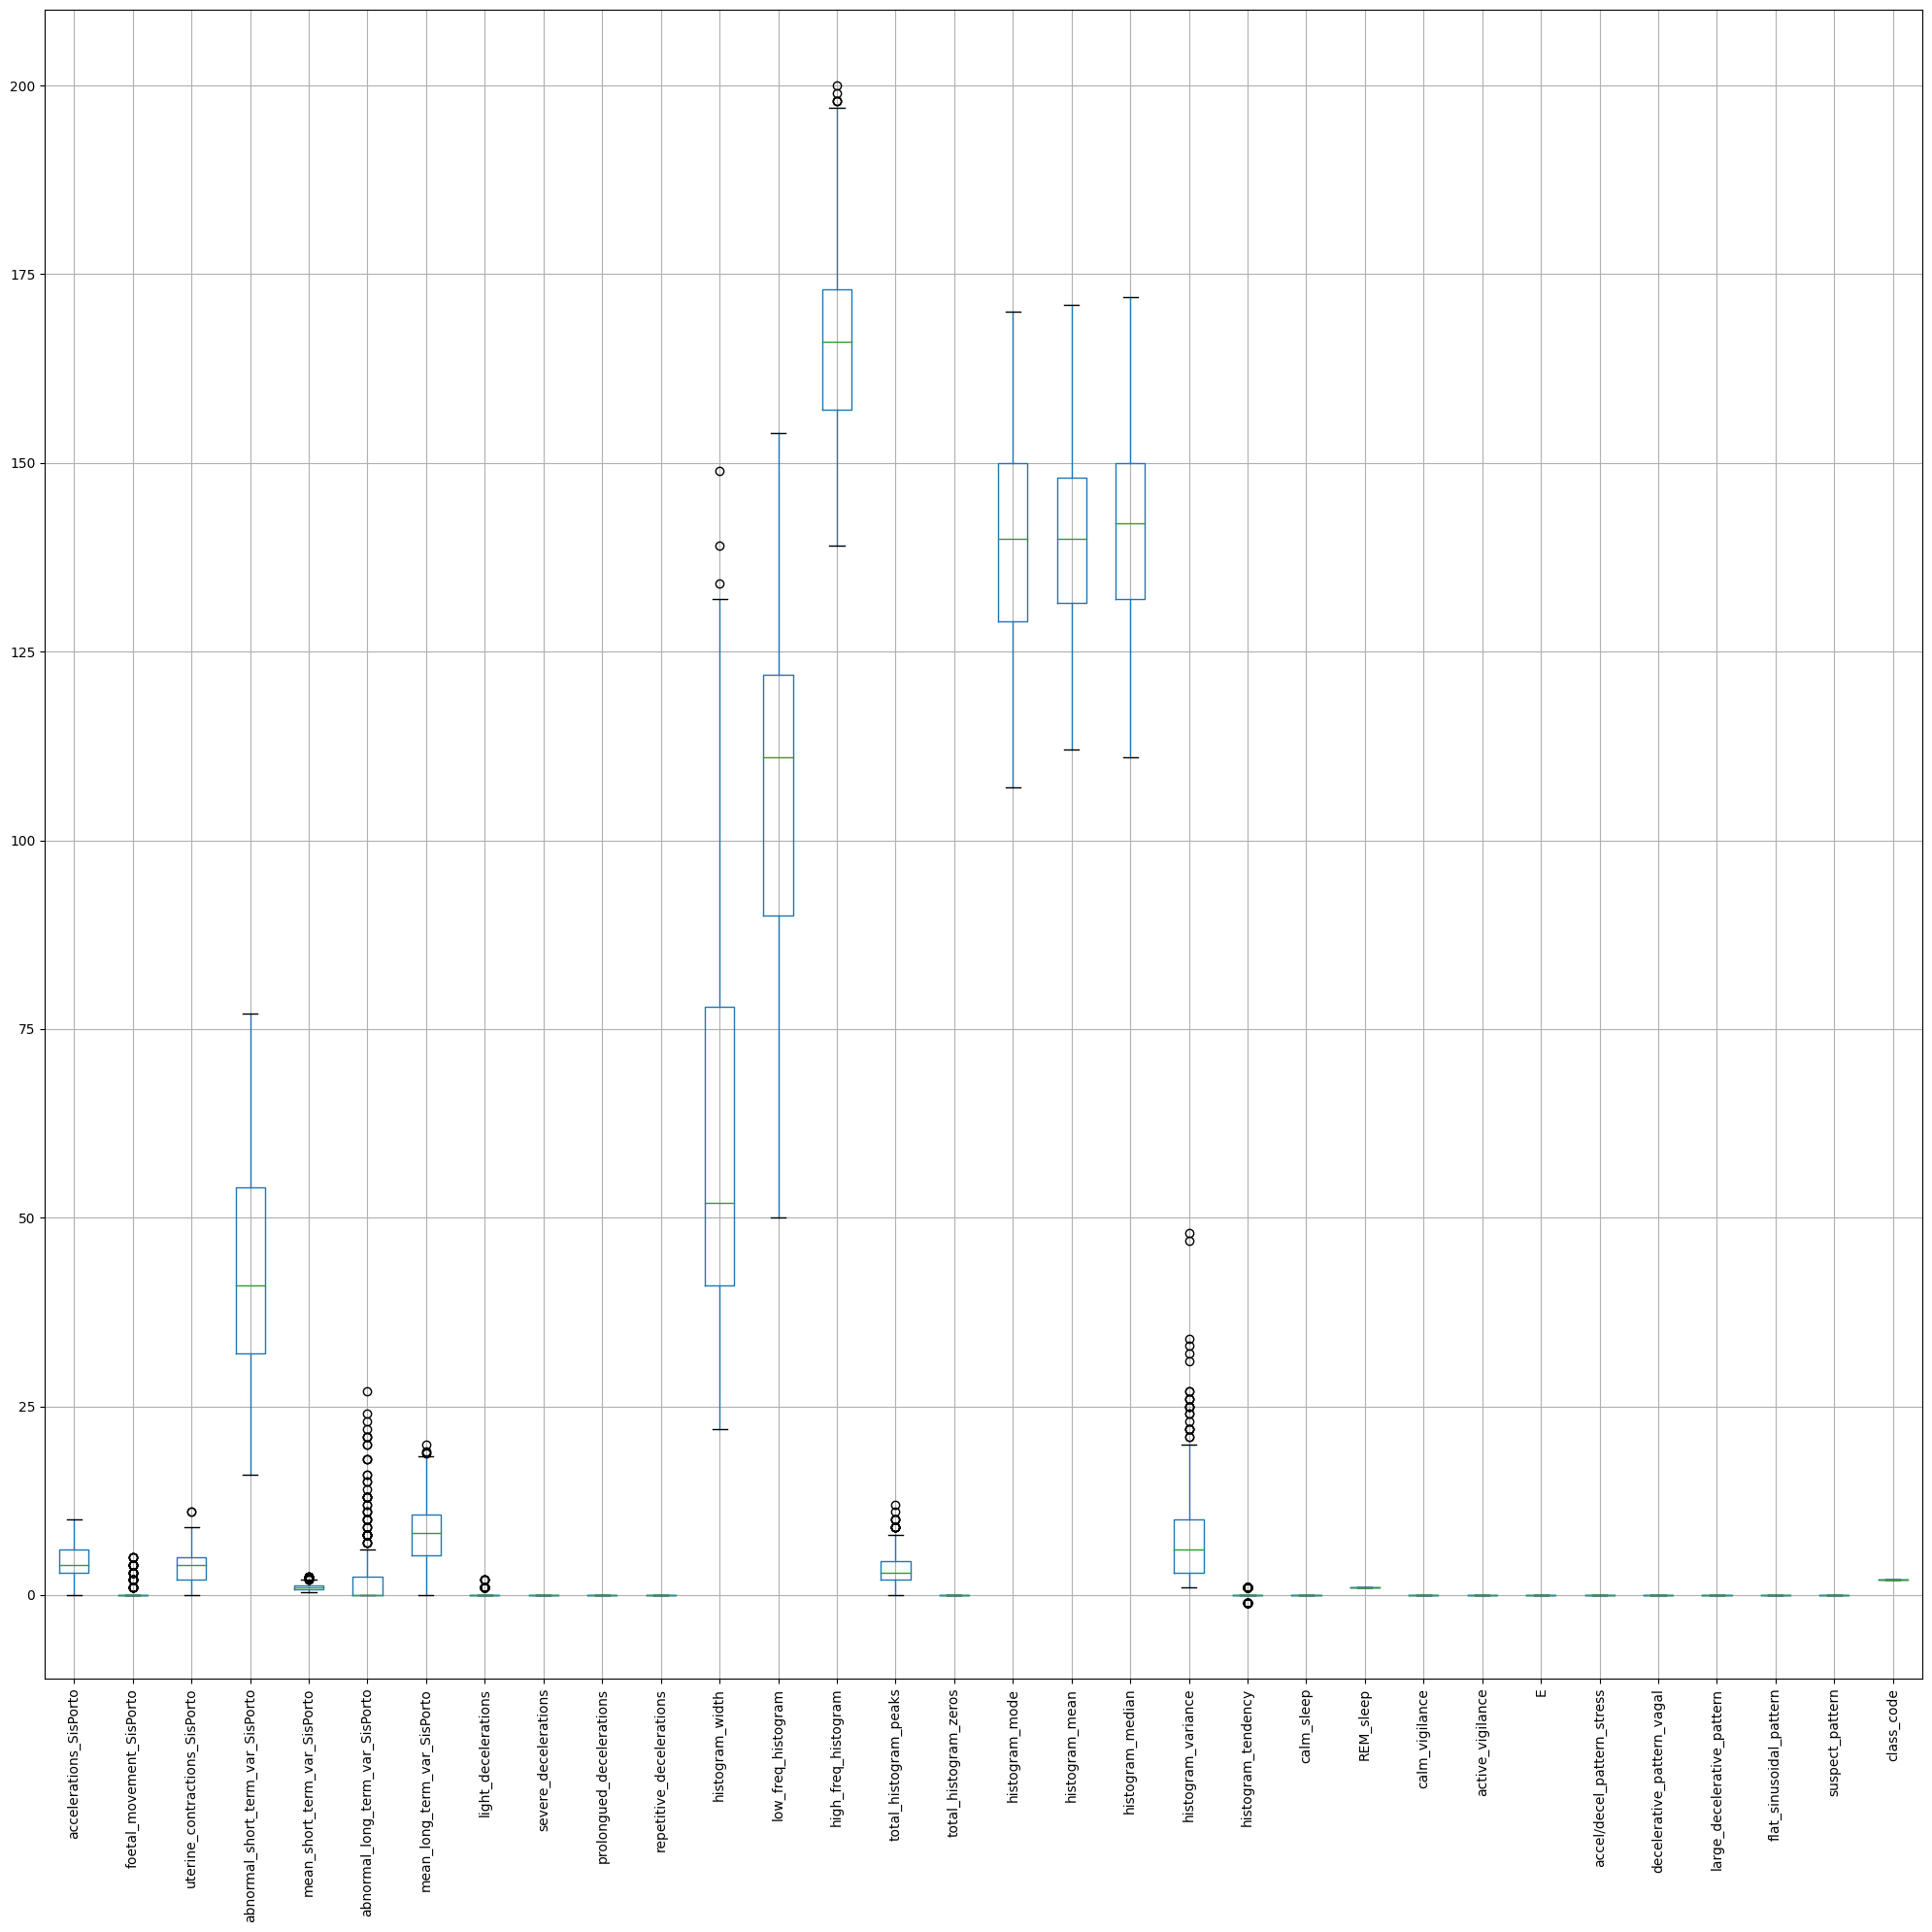

In [ ]:
# df_outlier_iqr.isnull().sum(axis=0)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
box4 = df_outlier_iqr.drop(['start_instant', 'end_instant', 'baseline_value_expert', 'baseline_value_SisPorto', 'Output'], axis=1)
box4.boxplot(ax=ax, rot=90, showfliers=True)
plt.tight_layout()
plt.show()

#### Robust Covariance

In [ ]:
# Removing outliers present in the data using Robust Covariance
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(random_state=0).fit(df)
# clf.predict(df)
df_outlier_robust_covariance = df[clf.predict(df) == 1]
df_outlier_robust_covariance

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


start_instant  end_instant  baseline_value_expert  \
2               5.0        632.0                  132.0   
3             177.0        779.0                  133.0   
4             411.0       1192.0                  134.0   
5             533.0       1147.0                  132.0   
8              62.0        679.0                  122.0   
...             ...          ...                    ...   
2122         2059.0       2867.0                  140.0   
2123         1576.0       2867.0                  140.0   
2124         1576.0       2596.0                  140.0   
2125         1576.0       3049.0                  140.0   
2126         2796.0       3415.0                  142.0   

      baseline_value_SisPorto  accelerations_SisPorto  \
2                       132.0                     4.0   
3                       133.0                     2.0   
4                       134.0                     2.0   
5                       132.0                     4.0   
8                       122.0                     0.0   
...                       ...                     ...   
2122                    140.0                     0.0   
2123                    140.0                     1.0   
2124                    140.0                     1.0   
2125                    140.0                     1.0   
2126                    142.0                     1.0   

      foetal_movement_SisPorto  uterine_contractions_SisPorto  \
2                          0.0                            4.0   
3                          0.0                            5.0   
4                          0.0                            6.0   
5                          0.0                            5.0   
8                          0.0                            0.0   
...                        ...                            ...   
2122                       0.0                            6.0   
2123                       0.0                            9.0   
2124                       0.0                            7.0   
2125                       0.0                            9.0   
2126                       1.0                            5.0   

      abnormal_short_term_var_SisPorto  mean_short_term_var_SisPorto  \
2                                 17.0                           2.1   
3                                 16.0                           2.1   
4                                 16.0                           2.4   
5                                 16.0                           2.4   
8                                 83.0                           0.5   
...                                ...                           ...   
2122                              79.0                           0.2   
2123                              78.0                           0.4   
2124                              79.0                           0.4   
2125                              78.0                           0.4   
2126                              74.0                           0.4   

      abnormal_long_term_var_SisPorto  ...  calm_vigilance  active_vigilance  \
2                                 0.0  ...             0.0               0.0   
3                                 0.0  ...             0.0               0.0   
4                                 0.0  ...             0.0               0.0   
5                                 0.0  ...             0.0               0.0   
8                                 6.0  ...             0.0               0.0   
...                               ...  ...             ...               ...   
2122                             25.0  ...             0.0               0.0   
2123                             22.0  ...             0.0               0.0   
2124                             20.0  ...             0.0               0.0   
2125                             27.0  ...             0.0               0.0   
2126                             36.0  ...             0.0               0.0   

     

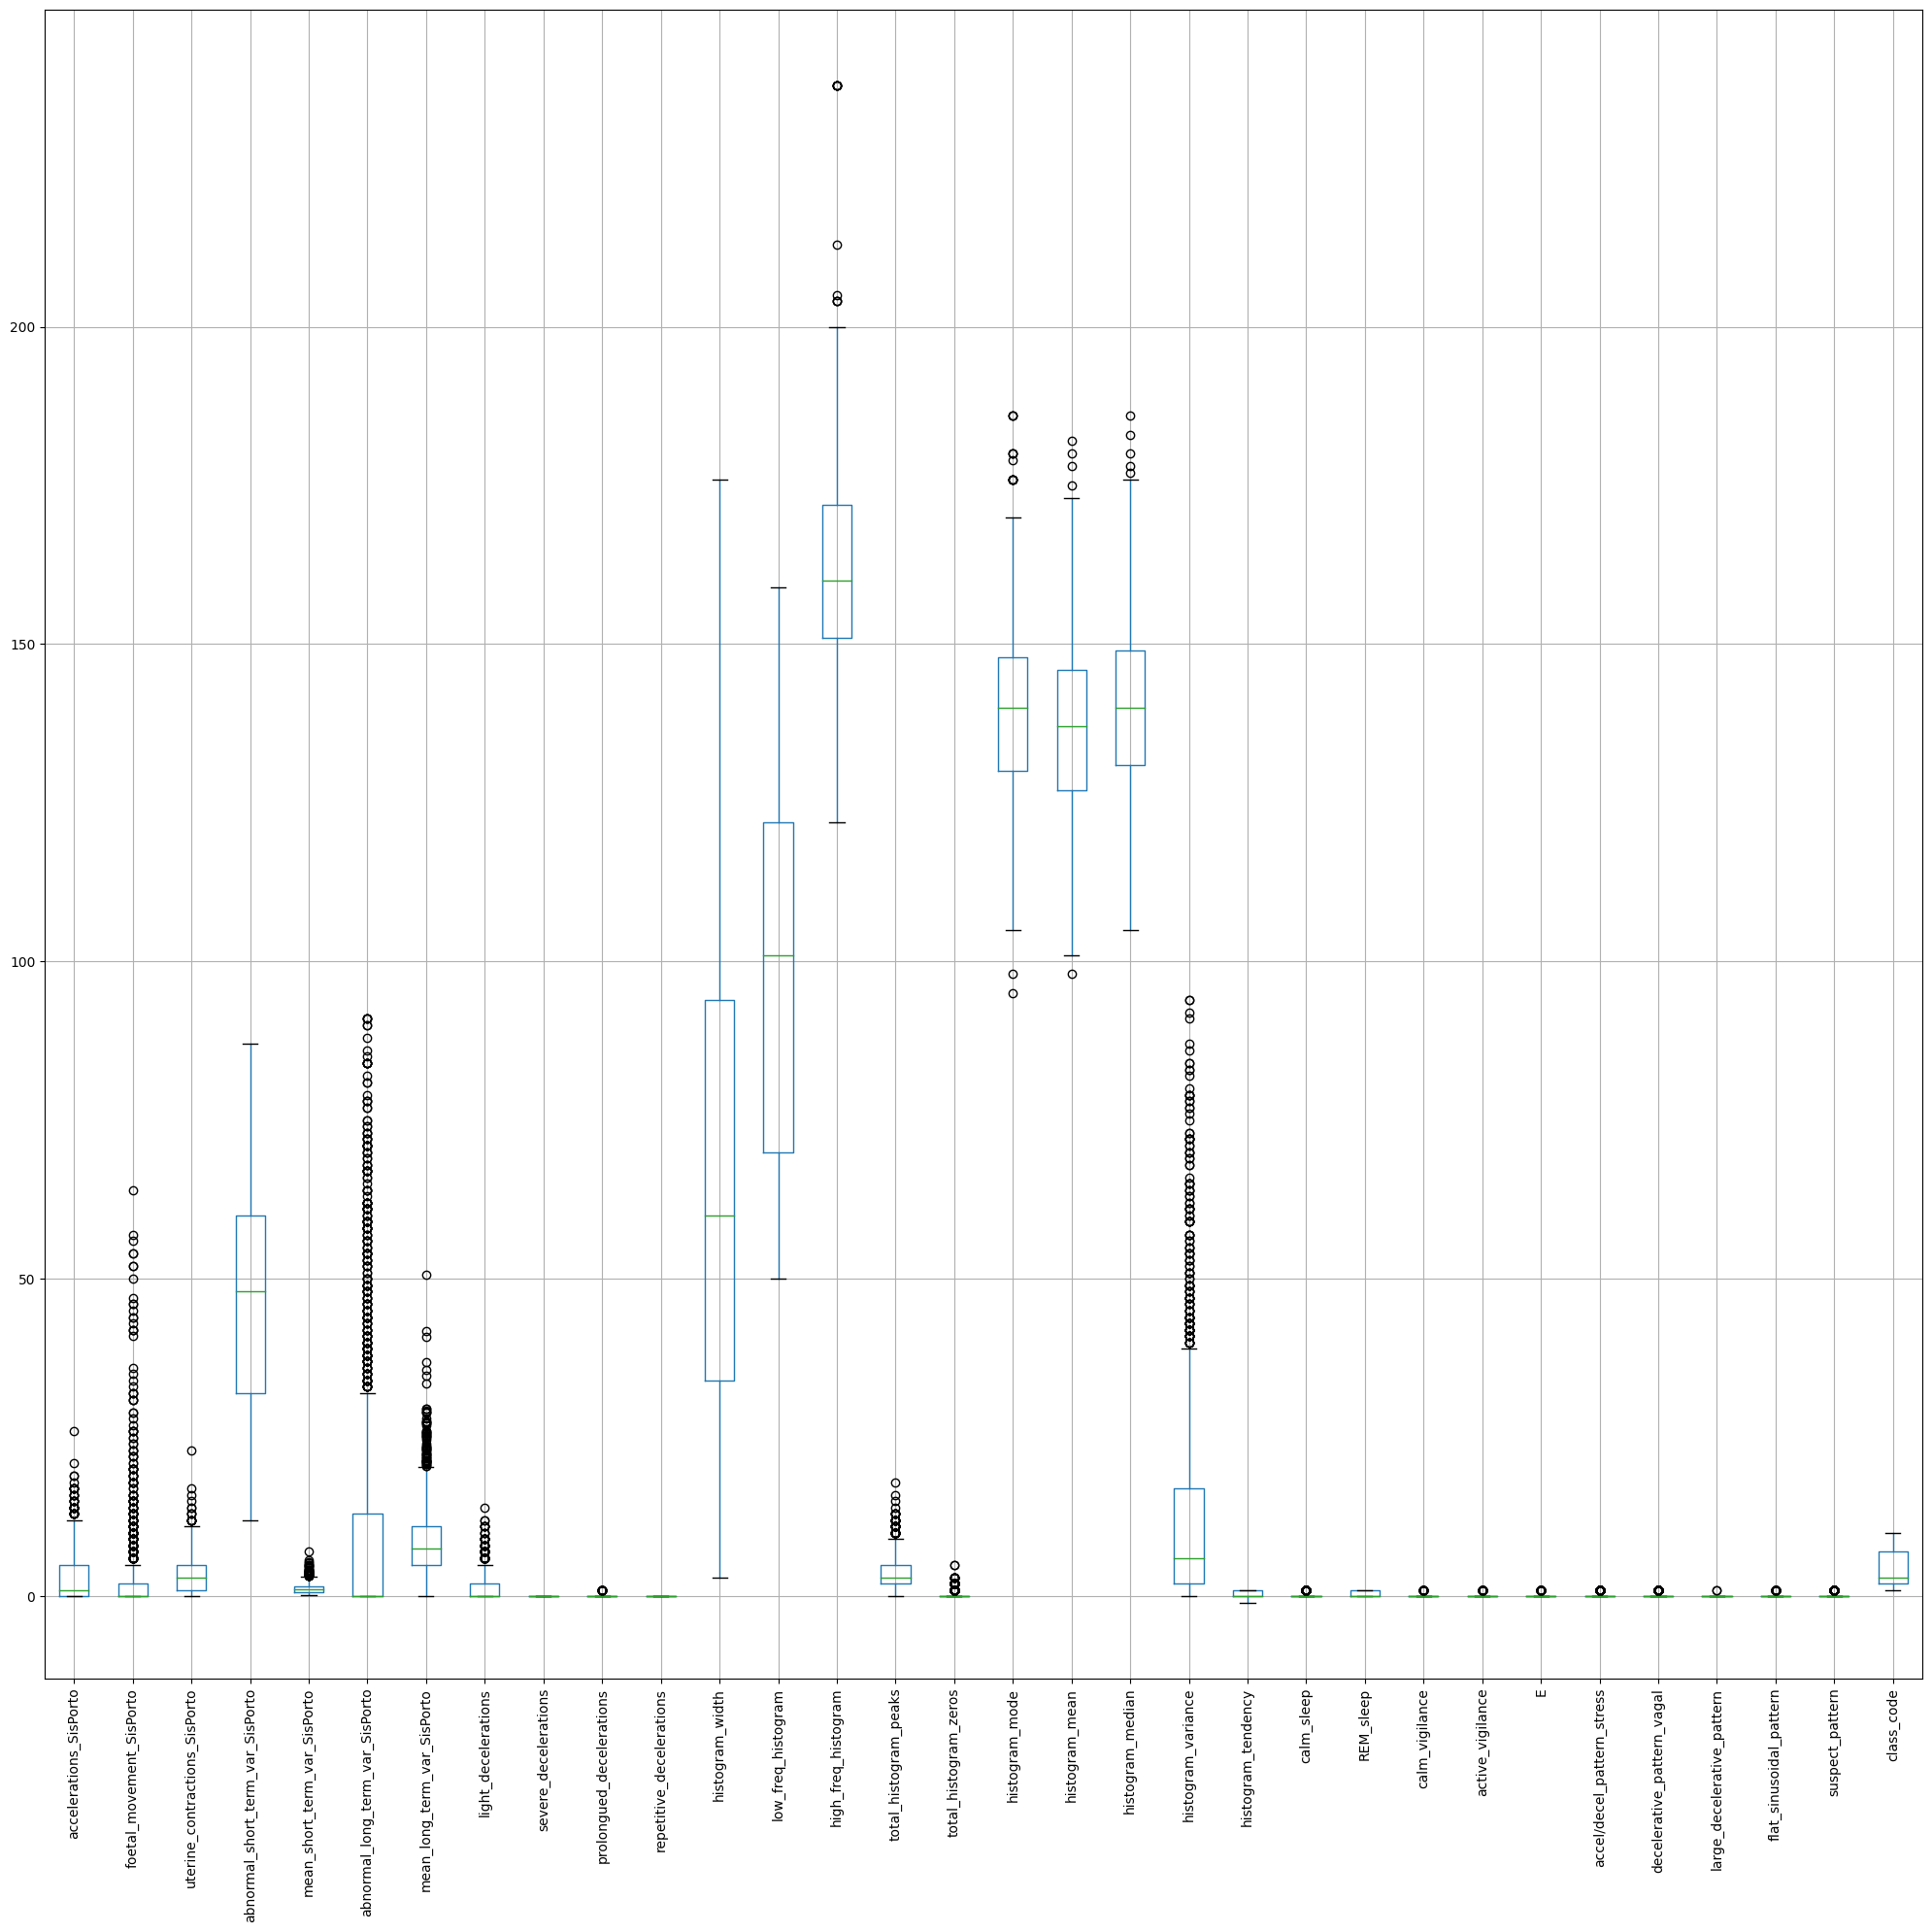

In [ ]:
# df_outlier_robust_covariance.isnull().sum(axis=0)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
box5 = df_outlier_robust_covariance.drop(['start_instant', 'end_instant', 'baseline_value_expert', 'baseline_value_SisPorto', 'Output'], axis=1)
box5.boxplot(ax=ax, rot=90, showfliers=True)
plt.tight_layout()
plt.show()

## Feature Engineering

In [ ]:
preprocessed_df = df_outlier_robust_covariance.copy(deep=True)
preprocessed_df.describe()

start_instant  end_instant  baseline_value_expert  \
count    1913.000000  1913.000000            1913.000000   
mean      877.594877  1702.540512             133.637219   
std       901.008710   937.321632               9.986084   
min         0.000000   287.000000             106.000000   
25%        50.000000  1007.000000             126.000000   
50%       533.000000  1219.000000             133.000000   
75%      1522.000000  2438.000000             141.000000   
max      3296.000000  3599.000000             160.000000   

       baseline_value_SisPorto  accelerations_SisPorto  \
count              1913.000000             1913.000000   
mean                133.637219                2.785677   
std                   9.986084                3.589132   
min                 106.000000                0.000000   
25%                 126.000000                0.000000   
50%                 133.000000                1.000000   
75%                 141.000000                5.000000   
max                 160.000000               26.000000   

       foetal_movement_SisPorto  uterine_contractions_SisPorto  \
count               1913.000000                    1913.000000   
mean                   2.451124                       3.581286   
std                    6.576301                       2.823023   
min                    0.000000                       0.000000   
25%                    0.000000                       1.000000   
50%                    0.000000                       3.000000   
75%                    2.000000                       5.000000   
max                   64.000000                      23.000000   

       abnormal_short_term_var_SisPorto  mean_short_term_var_SisPorto  \
count                       1913.000000                   1913.000000   
mean                          46.866702                      1.212337   
std                           17.137229                      0.770253   
min                           12.000000                      0.200000   
25%                           32.000000                      0.600000   
50%                           48.000000                      1.100000   
75%                           60.000000                      1.600000   
max                           87.000000                      7.000000   

       abnormal_long_term_var_SisPorto  ...  calm_vigilance  active_vigilance  \
count                      1913.000000  ...     1913.000000       1913.000000   
mean                         10.848406  ...        0.027705          0.032933   
std                          19.075111  ...        0.164170          0.178507   
min                           0.000000  ...        0.000000          0.000000   
25%                           0.000000  ...        0.000000          0.000000   
50%                           0.000000  ...        0.000000          0.000000   
75%                          13.000000  ...        0.000000          0.000000   
max                          91.000000  ...        1.000000          1.000000   

                 E  accel/decel_pattern_stress  decelerative_pattern_vagal  \
count  1913.000000                 1913.000000                 1913.000000   
mean      0.037637                    0.151594                    0.114480   
std       0.190367                    0.358721                    0.318476   
min       0.000000                    0.000000                    0.000000   
25%       0.000000                    0.000000                    0.000000   
50%       0.000000                    0.000000                    0.000000   
75%       0.000000                    0.000000                    0.000000   
max       1.000000                    1.000000                    1.000000   

       large_decelerative_pattern  flat_sinusoidal_pattern  suspect_pattern  \
count                 1913.000000              1913.000000      1913.000000   
mean                     0.001045                 0.033978         0.102980   
std                 

### Observing Corelation for feature selection

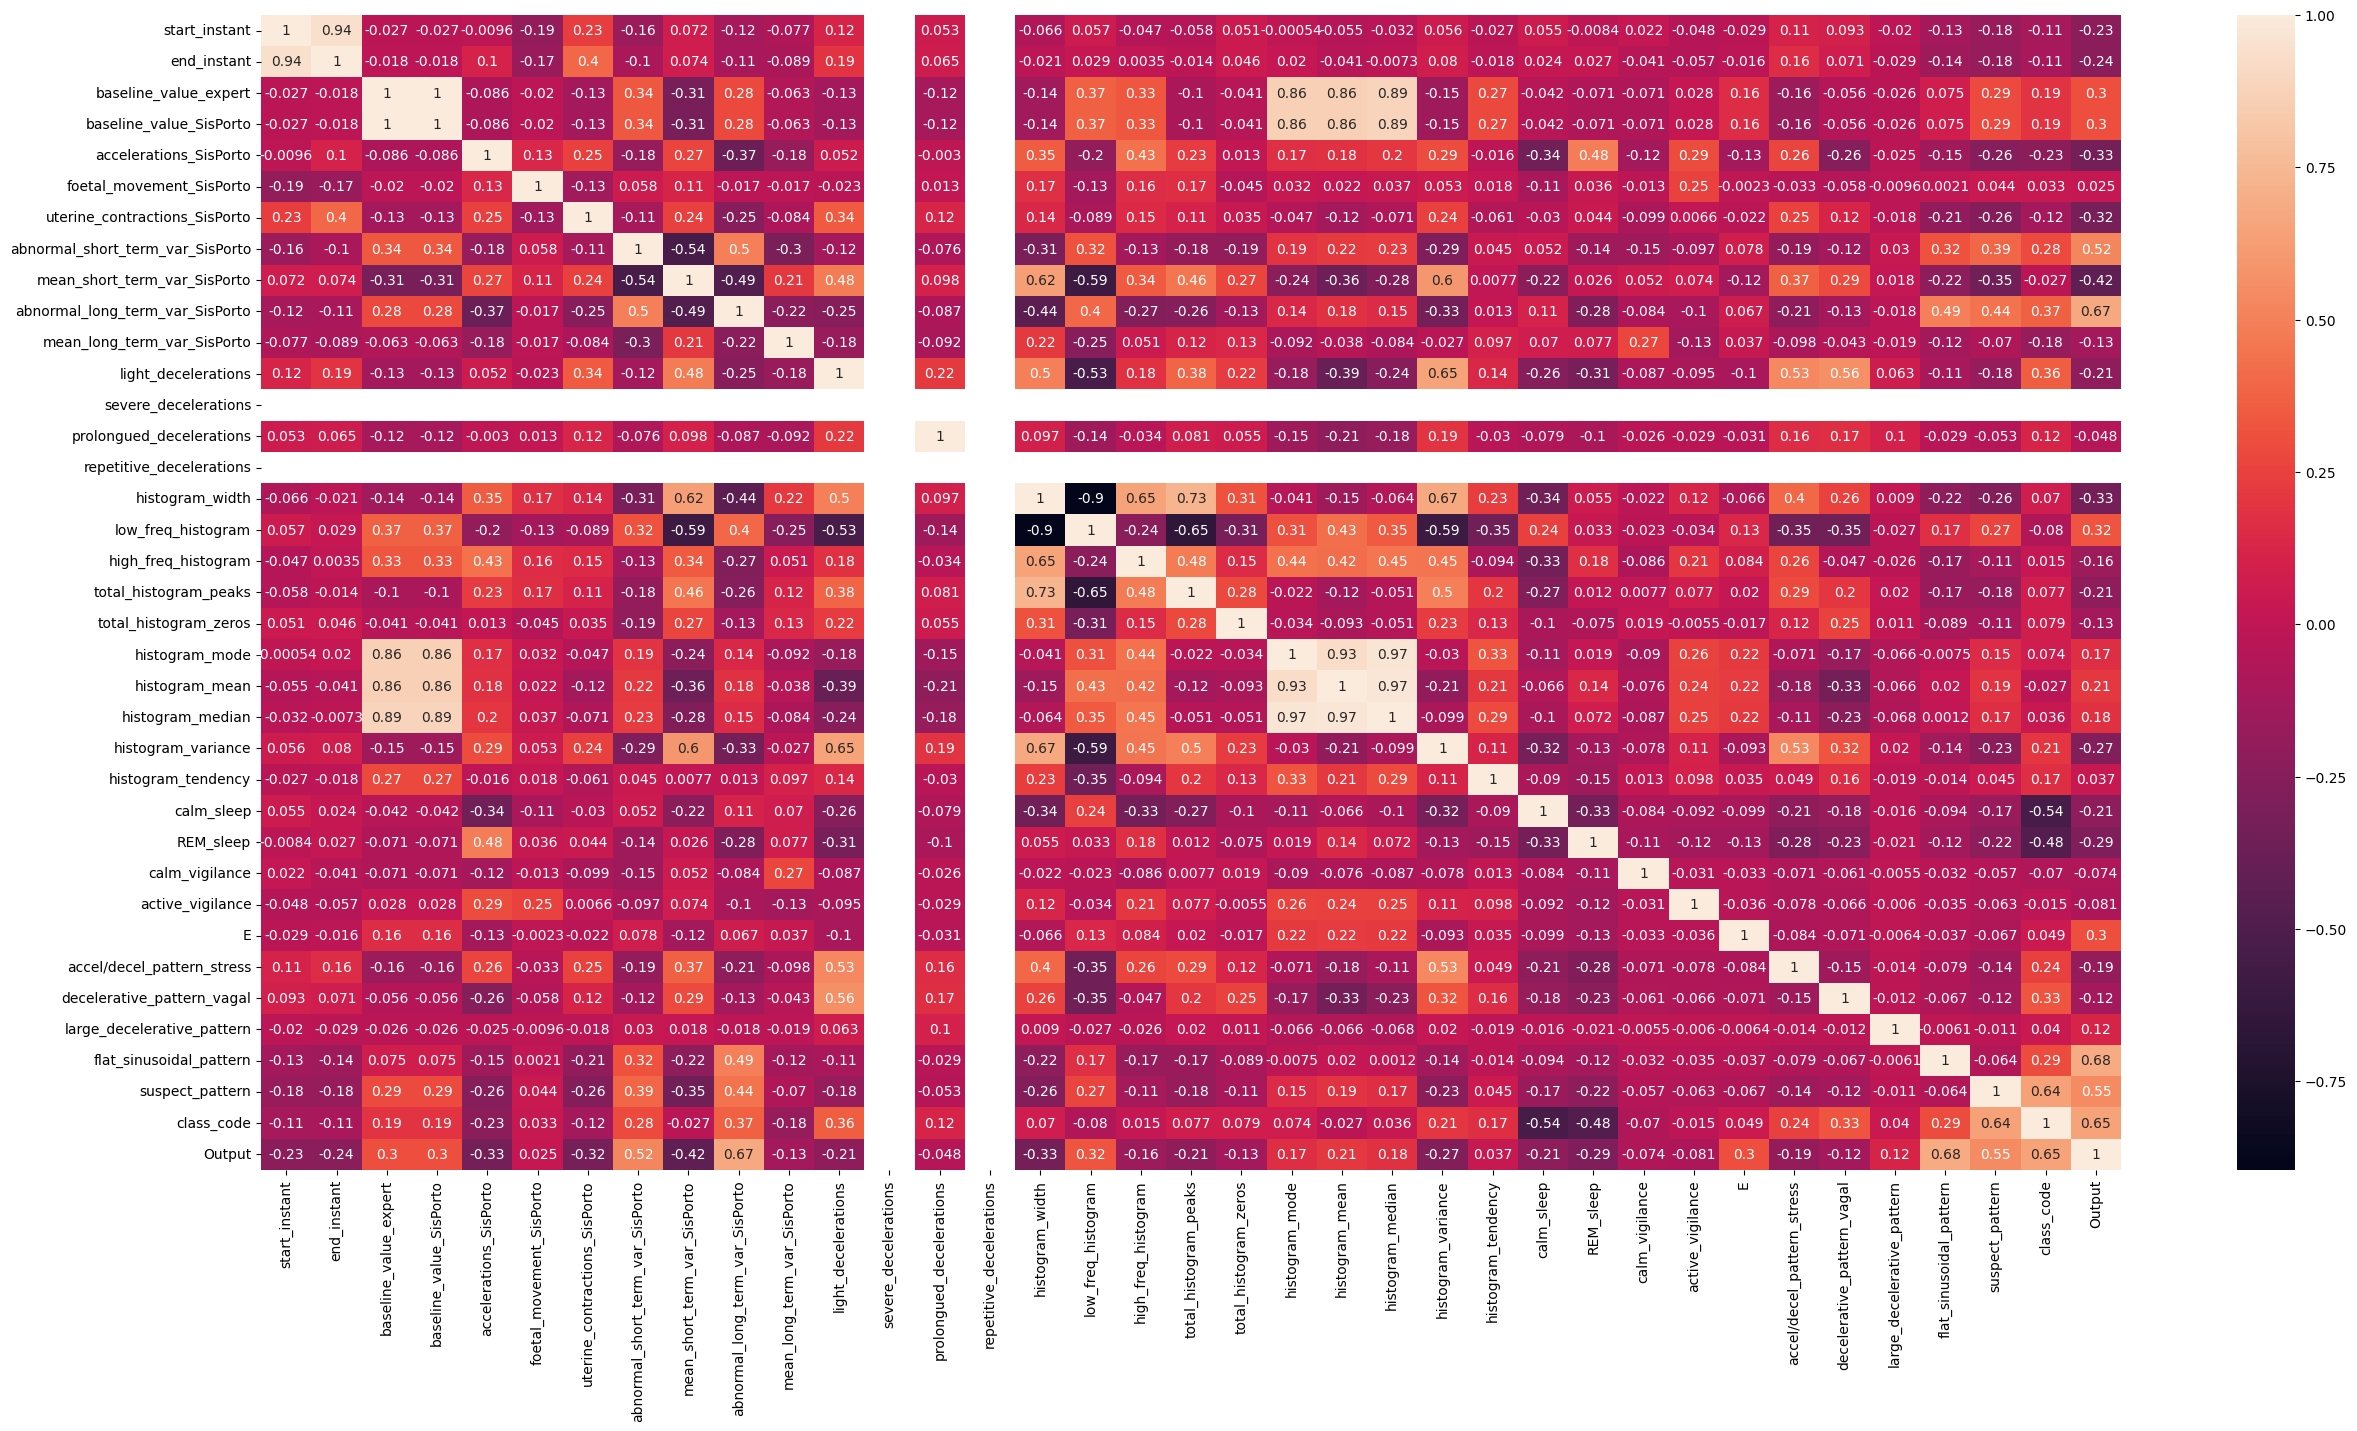

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(preprocessed_df.corr(), annot=True)

plt.show()

In [ ]:
# Cols to be removed:
col_removed = ['repetitive_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'start_instant', 'end_instant', 'histogram_mode', 'histogram_tendency', 'calm_vigilance', 'active_vigilance', 'baseline_value_expert']
preprocessed_df = preprocessed_df.drop(col_removed, axis=1)
preprocessed_df.head()

baseline_value_SisPorto  accelerations_SisPorto  foetal_movement_SisPorto  \
2                    132.0                     4.0                       0.0   
3                    133.0                     2.0                       0.0   
4                    134.0                     2.0                       0.0   
5                    132.0                     4.0                       0.0   
8                    122.0                     0.0                       0.0   

   uterine_contractions_SisPorto  abnormal_short_term_var_SisPorto  \
2                            4.0                              17.0   
3                            5.0                              16.0   
4                            6.0                              16.0   
5                            5.0                              16.0   
8                            0.0                              83.0   

   mean_short_term_var_SisPorto  abnormal_long_term_var_SisPorto  \
2                           2.1                              0.0   
3                           2.1                              0.0   
4                           2.4                              0.0   
5                           2.4                              0.0   
8                           0.5                              6.0   

   mean_long_term_var_SisPorto  light_decelerations  histogram_width  ...  \
2                         10.4                  2.0            130.0  ...   
3                         13.4                  2.0            130.0  ...   
4                         23.0                  2.0            117.0  ...   
5                         19.9                  0.0            117.0  ...   
8                         15.6                  0.0             68.0  ...   

   histogram_variance  calm_sleep  REM_sleep  accel/decel_pattern_stress  \
2                12.0         0.0        0.0                         1.0   
3                13.0         0.0        0.0                         1.0   
4                13.0         0.0        0.0                         1.0   
5                11.0         0.0        1.0                         0.0   
8                 3.0         0.0        0.0                         0.0   

   decelerative_pattern_vagal  large_decelerative_pattern  \
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   
5                         0.0                         0.0   
8                         0.0                         0.0   

   flat_sinusoidal_pattern  suspect_pattern  class_code  Output  
2                      0.0              0.0         6.0     1.0  
3                      0.0              0.0         6.0     1.0  
4                      0.0              0.0         6.0     1.0  
5                      0.0              0.0         2.0     1.0  
8                      1.0              0.0         9.0     3.0  

[5 rows x 26 columns]

## Exploring and Visualising the Data

*  Histograms, Scatter Plots, Pair Plots, Bar Plots, Distribution Plots



#### Pairplots

In [ ]:
# # Creating pairplots for the whole preprocessed dataset
# import seaborn as sns
# sns.pairplot(preprocessed_df, hue='Output')
# plt.show()

<ipython-input-41-8408a5c943be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_df1['Output'] = preprocessed_df['Output']


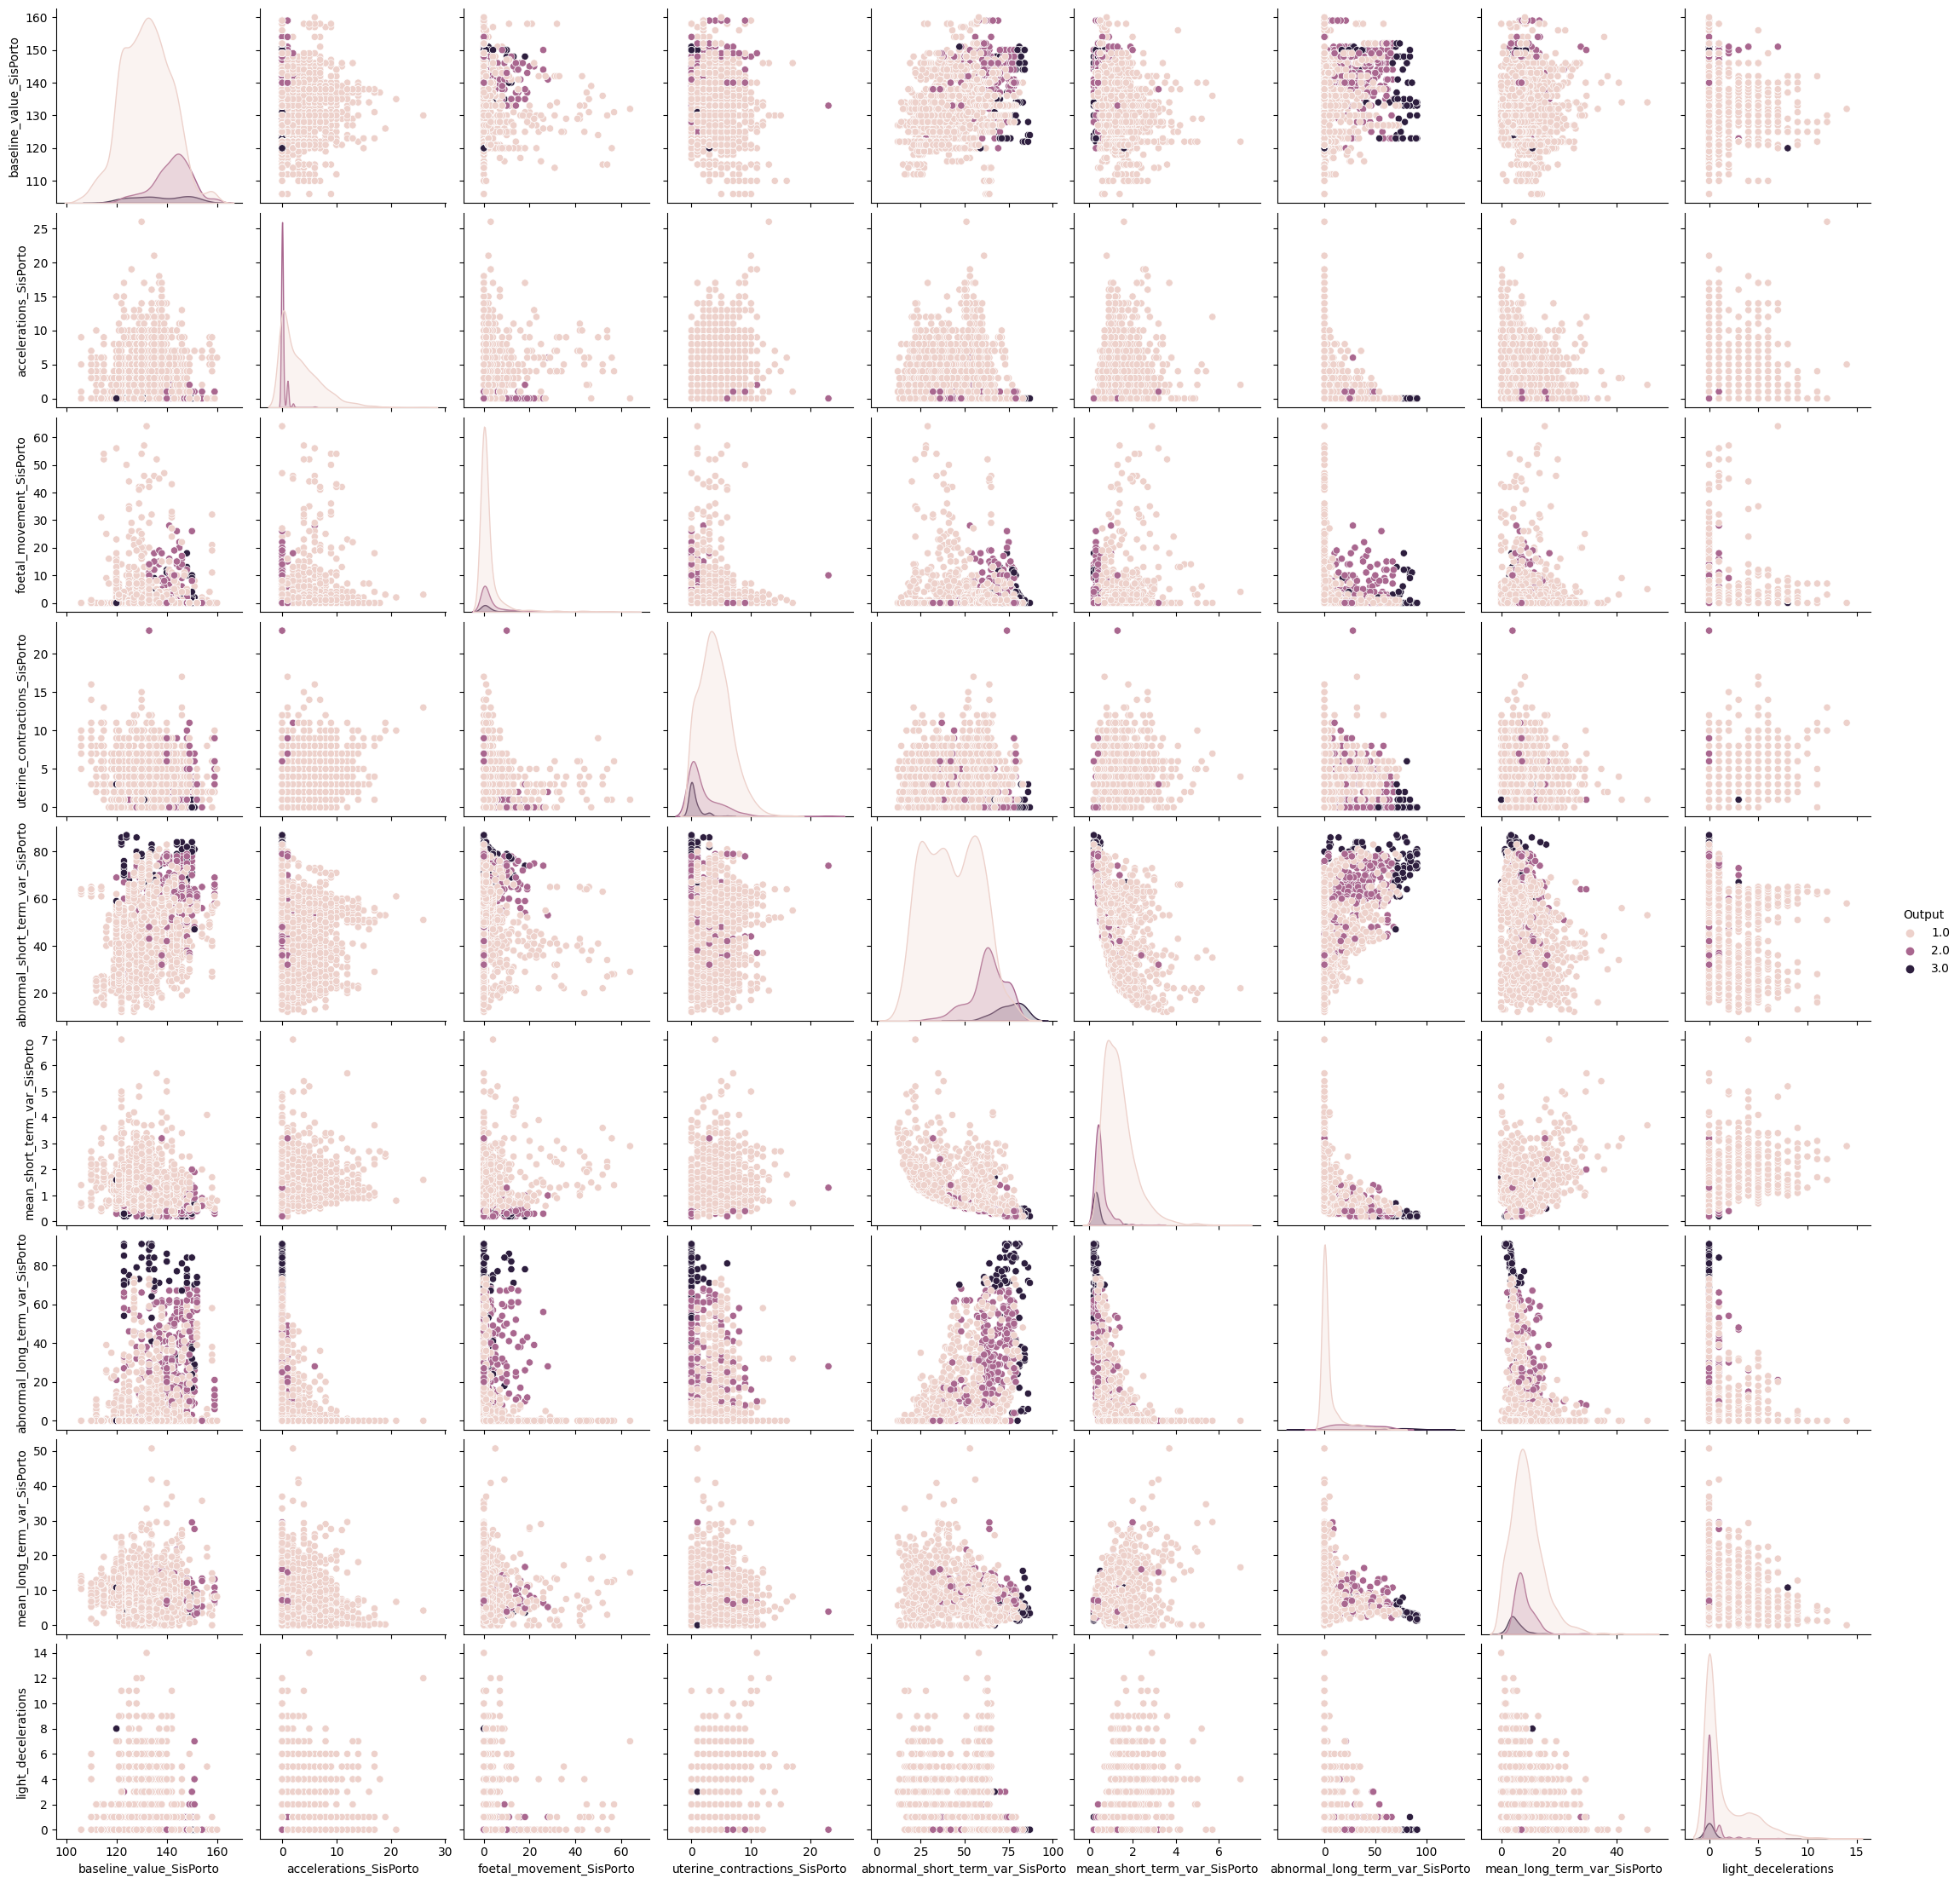

In [ ]:
# Creating pairplots
import seaborn as sns
pairplot_df1 = preprocessed_df.iloc[:, 0:9]
pairplot_df1['Output'] = preprocessed_df['Output']
sns.pairplot(pairplot_df1, hue='Output')
plt.show()

<ipython-input-42-fada1adbb208>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_df2['Output'] = preprocessed_df['Output']


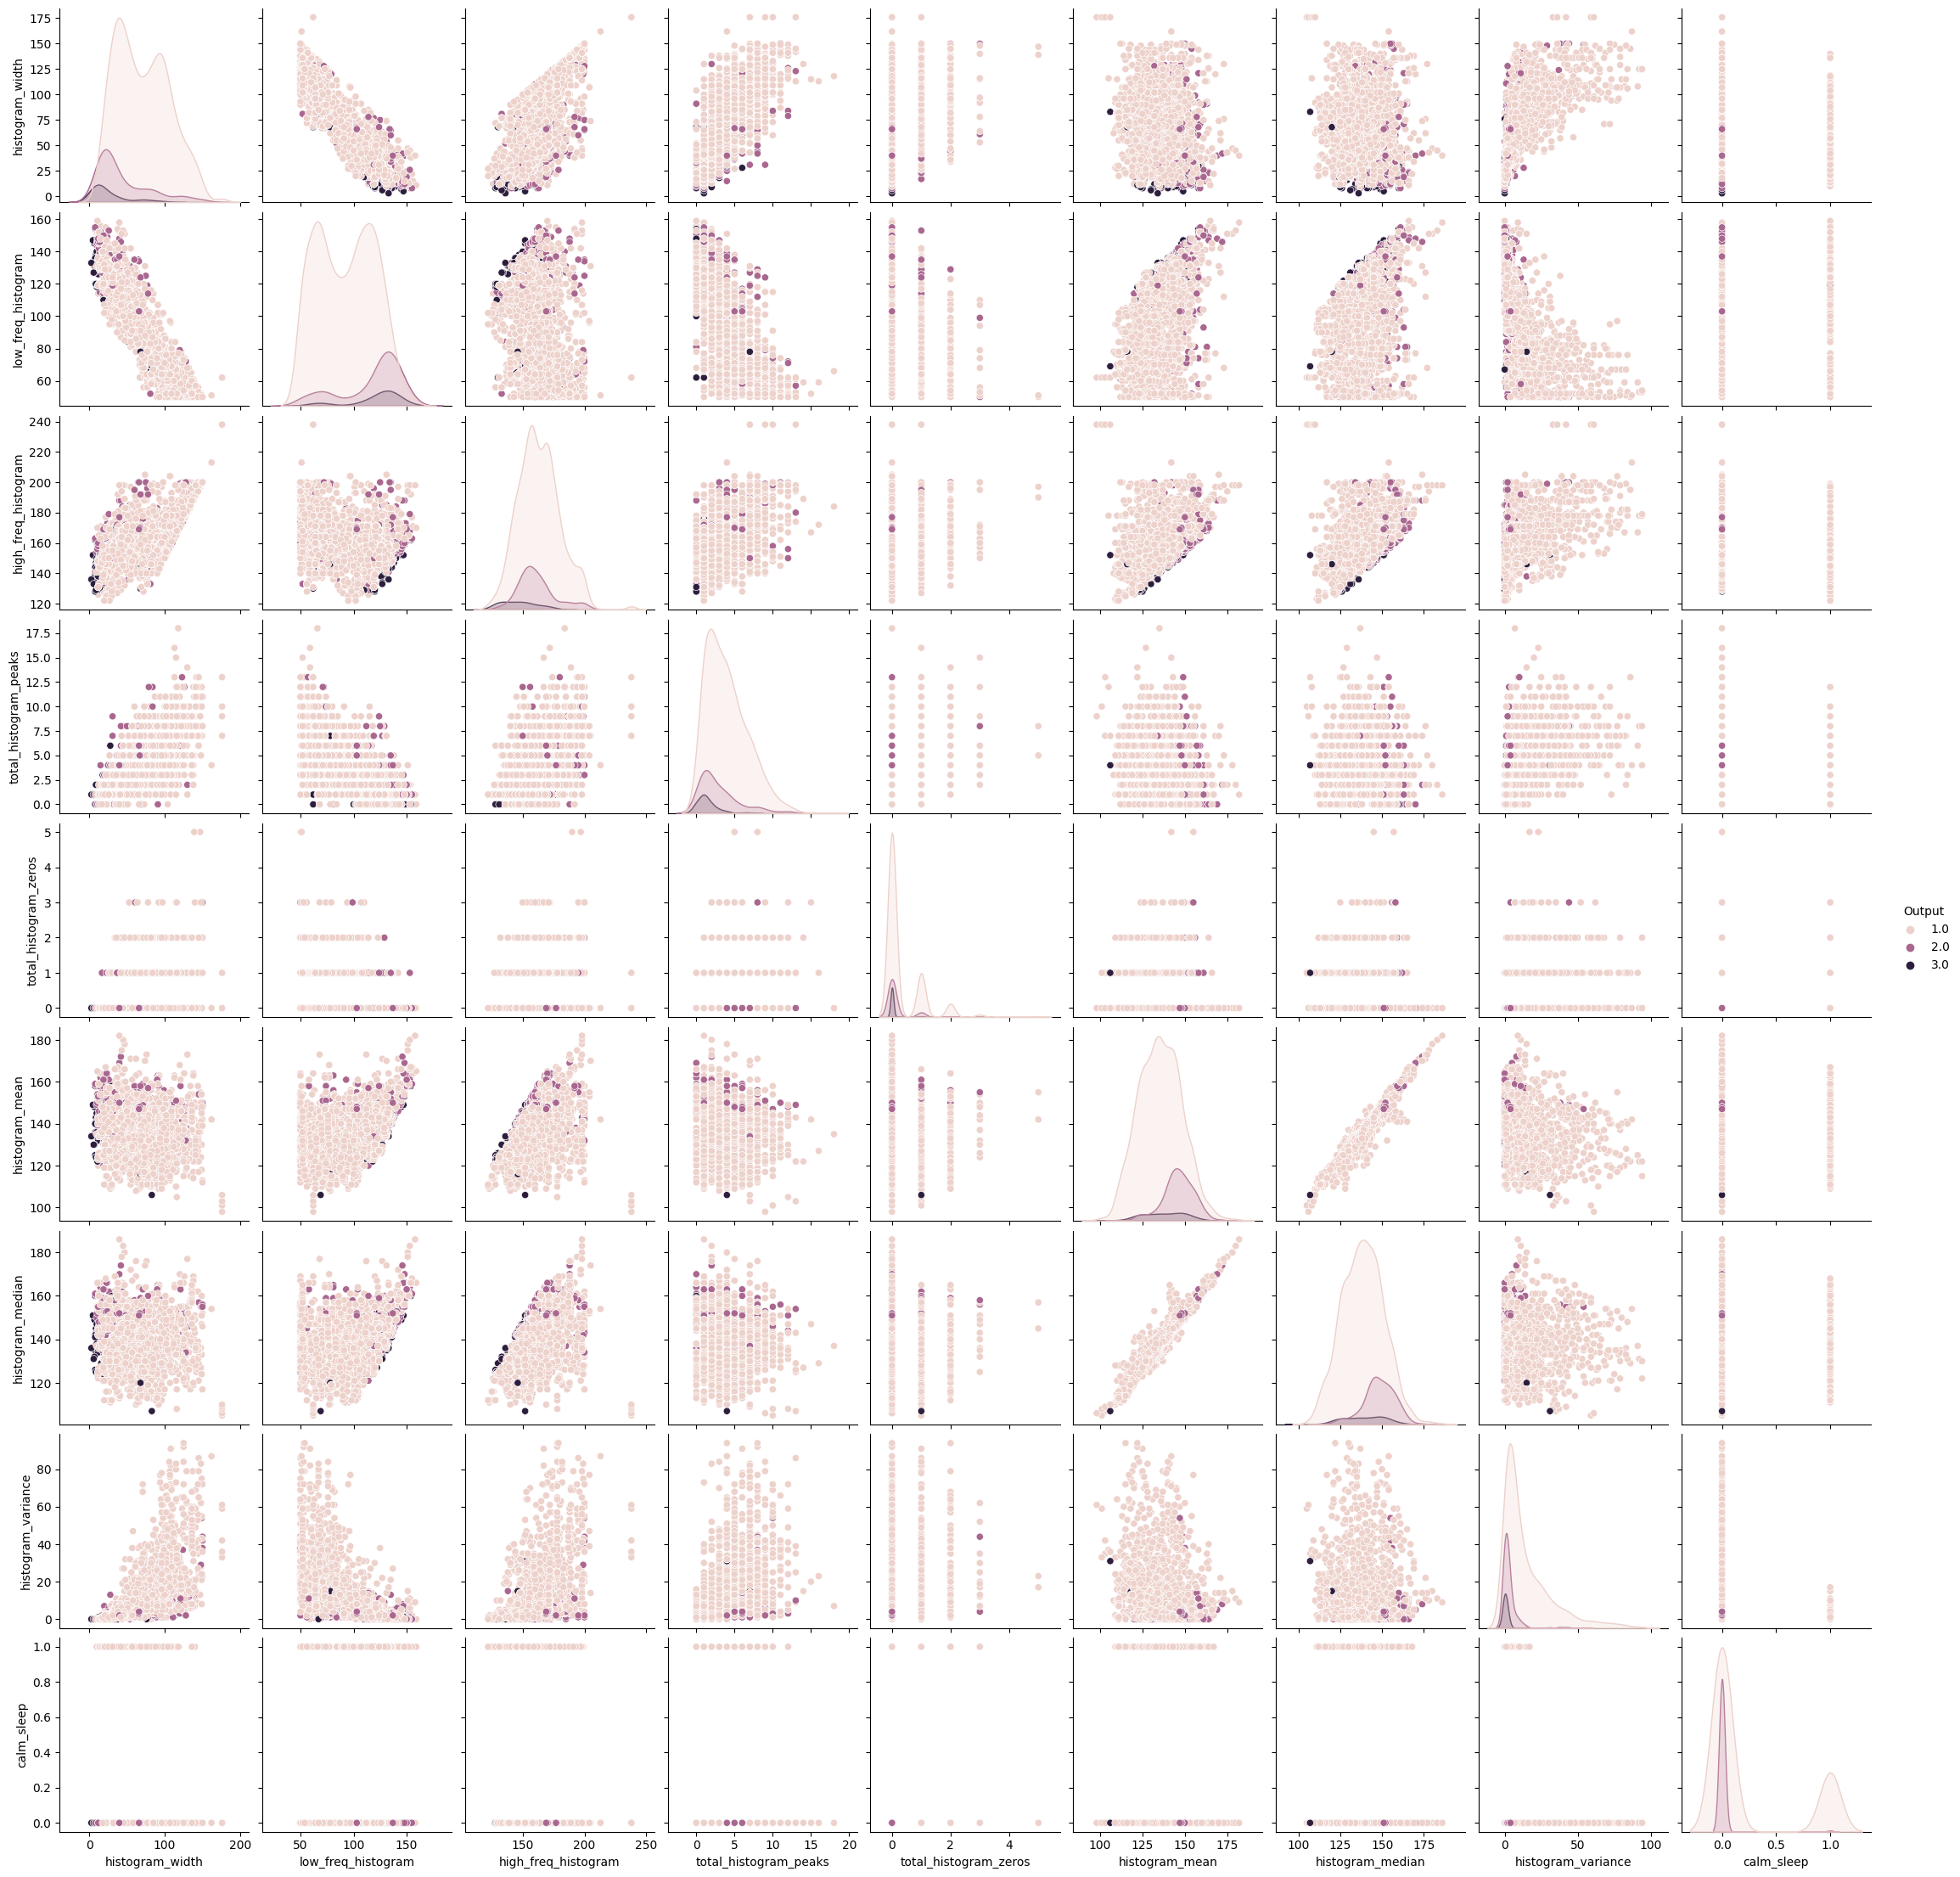

In [ ]:
# Creating pairplots
import seaborn as sns
pairplot_df2 = preprocessed_df.iloc[:, 9:18]
sns.set_palette("bright")
pairplot_df2['Output'] = preprocessed_df['Output']
sns.pairplot(pairplot_df2, hue='Output')
plt.show()

<ipython-input-43-277d04296d4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_df3['Output'] = preprocessed_df['Output']


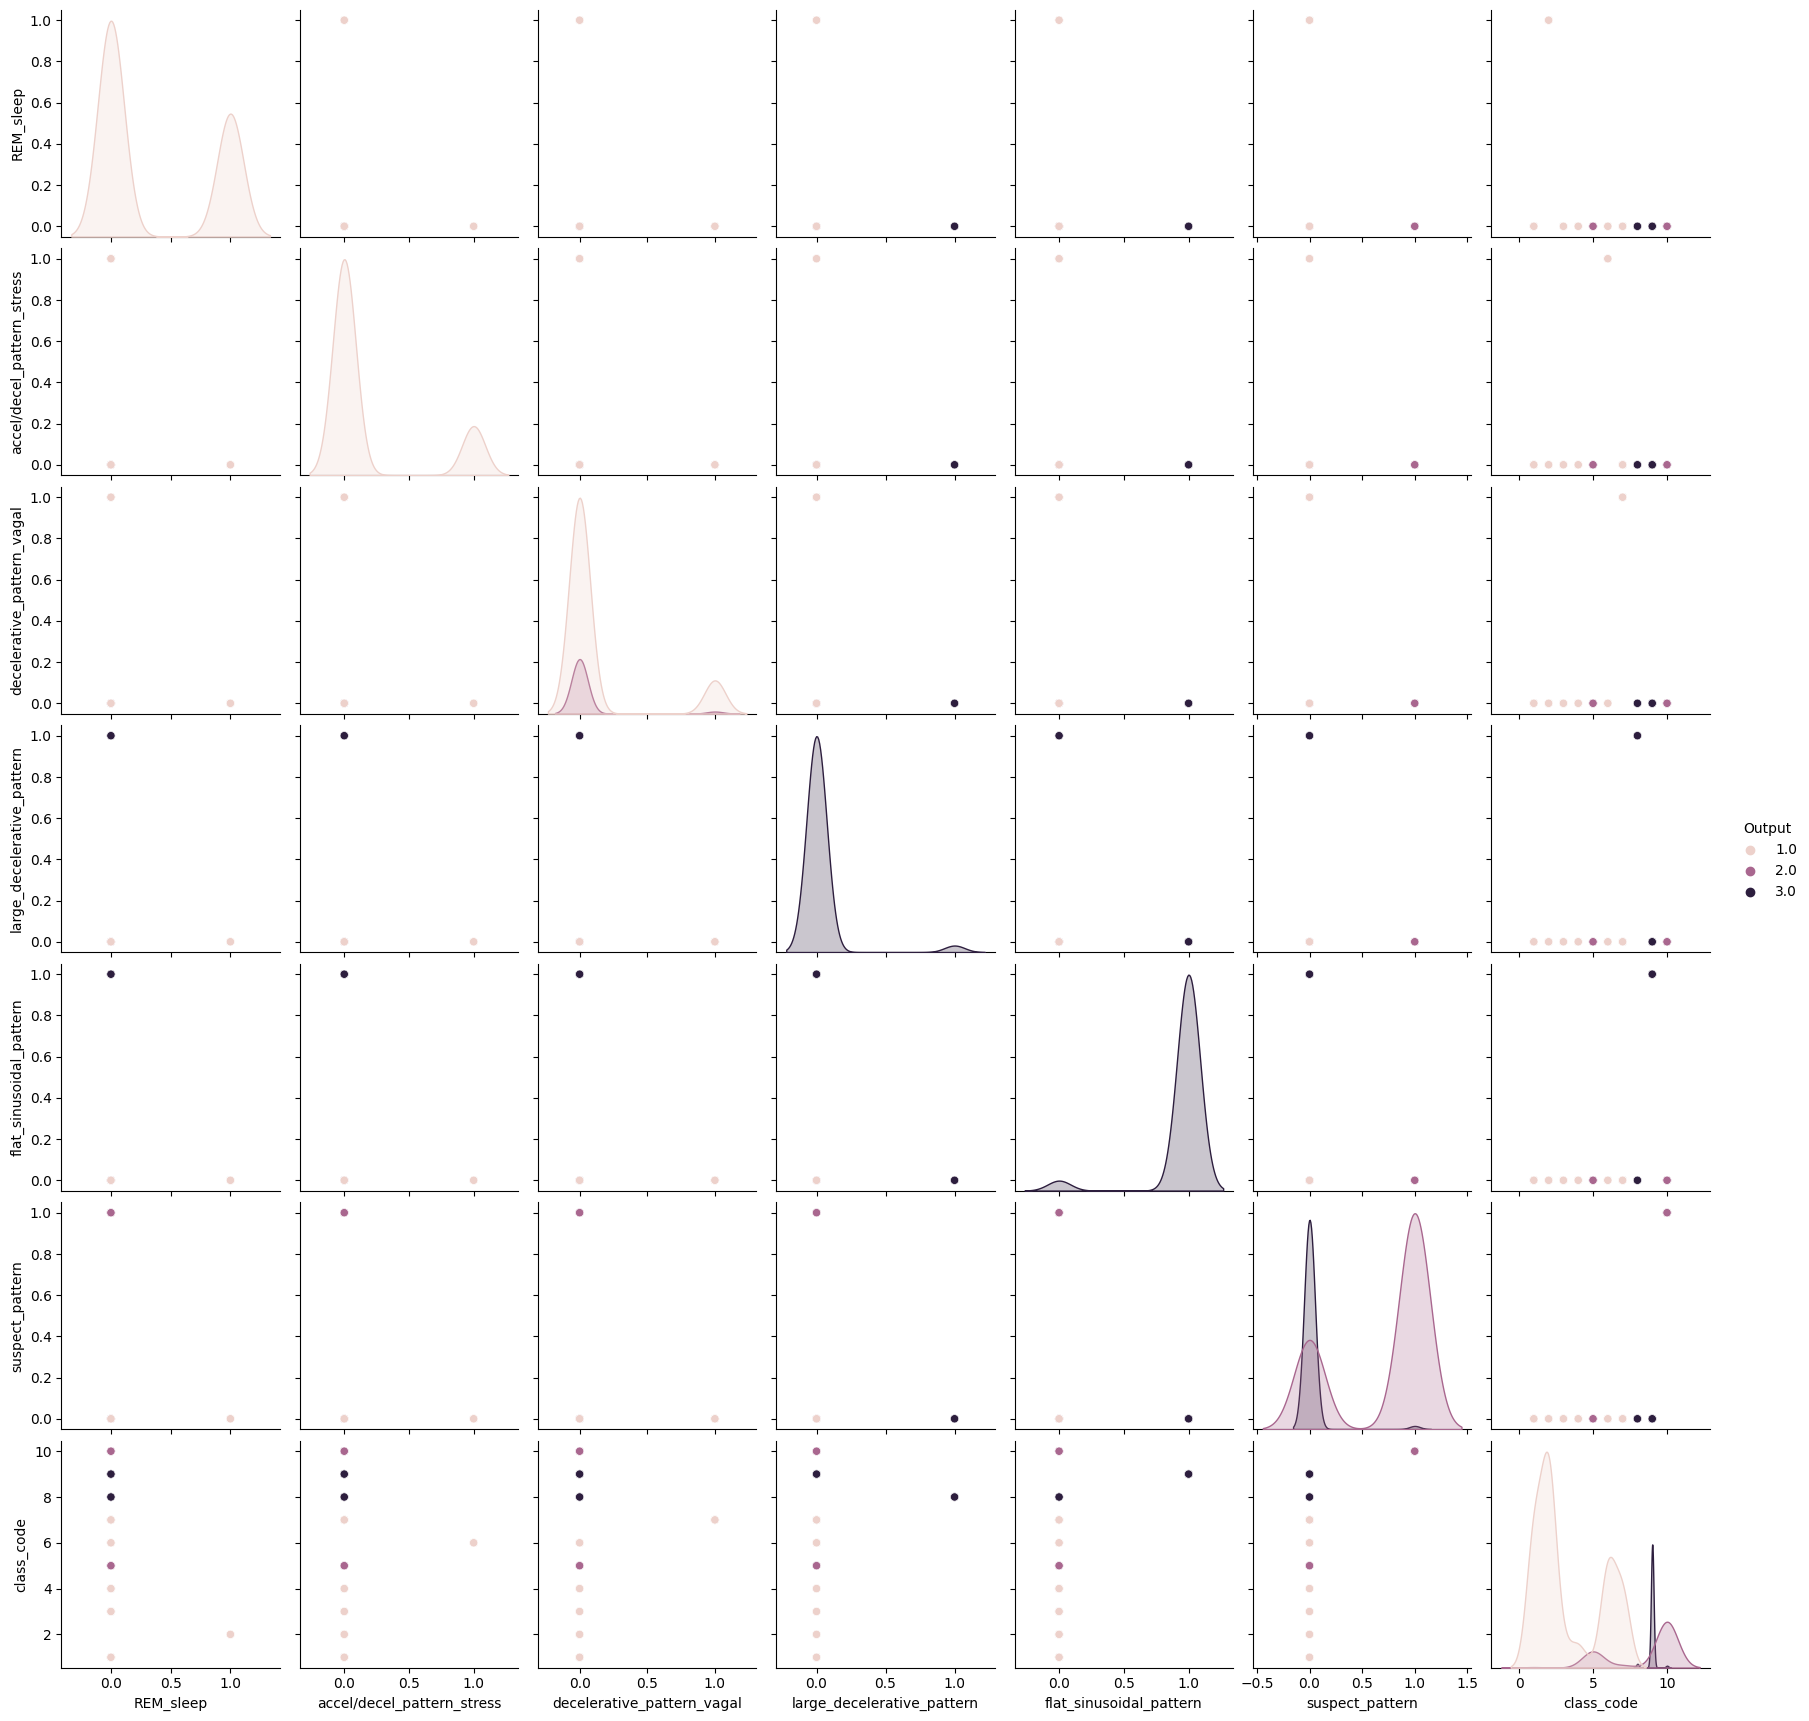

In [ ]:
# Creating pairplots
import seaborn as sns
pairplot_df3 = preprocessed_df.iloc[:, 18:26]
pairplot_df3['Output'] = preprocessed_df['Output']
sns.pairplot(pairplot_df3, hue='Output')
plt.show()

#### Scatter Plots

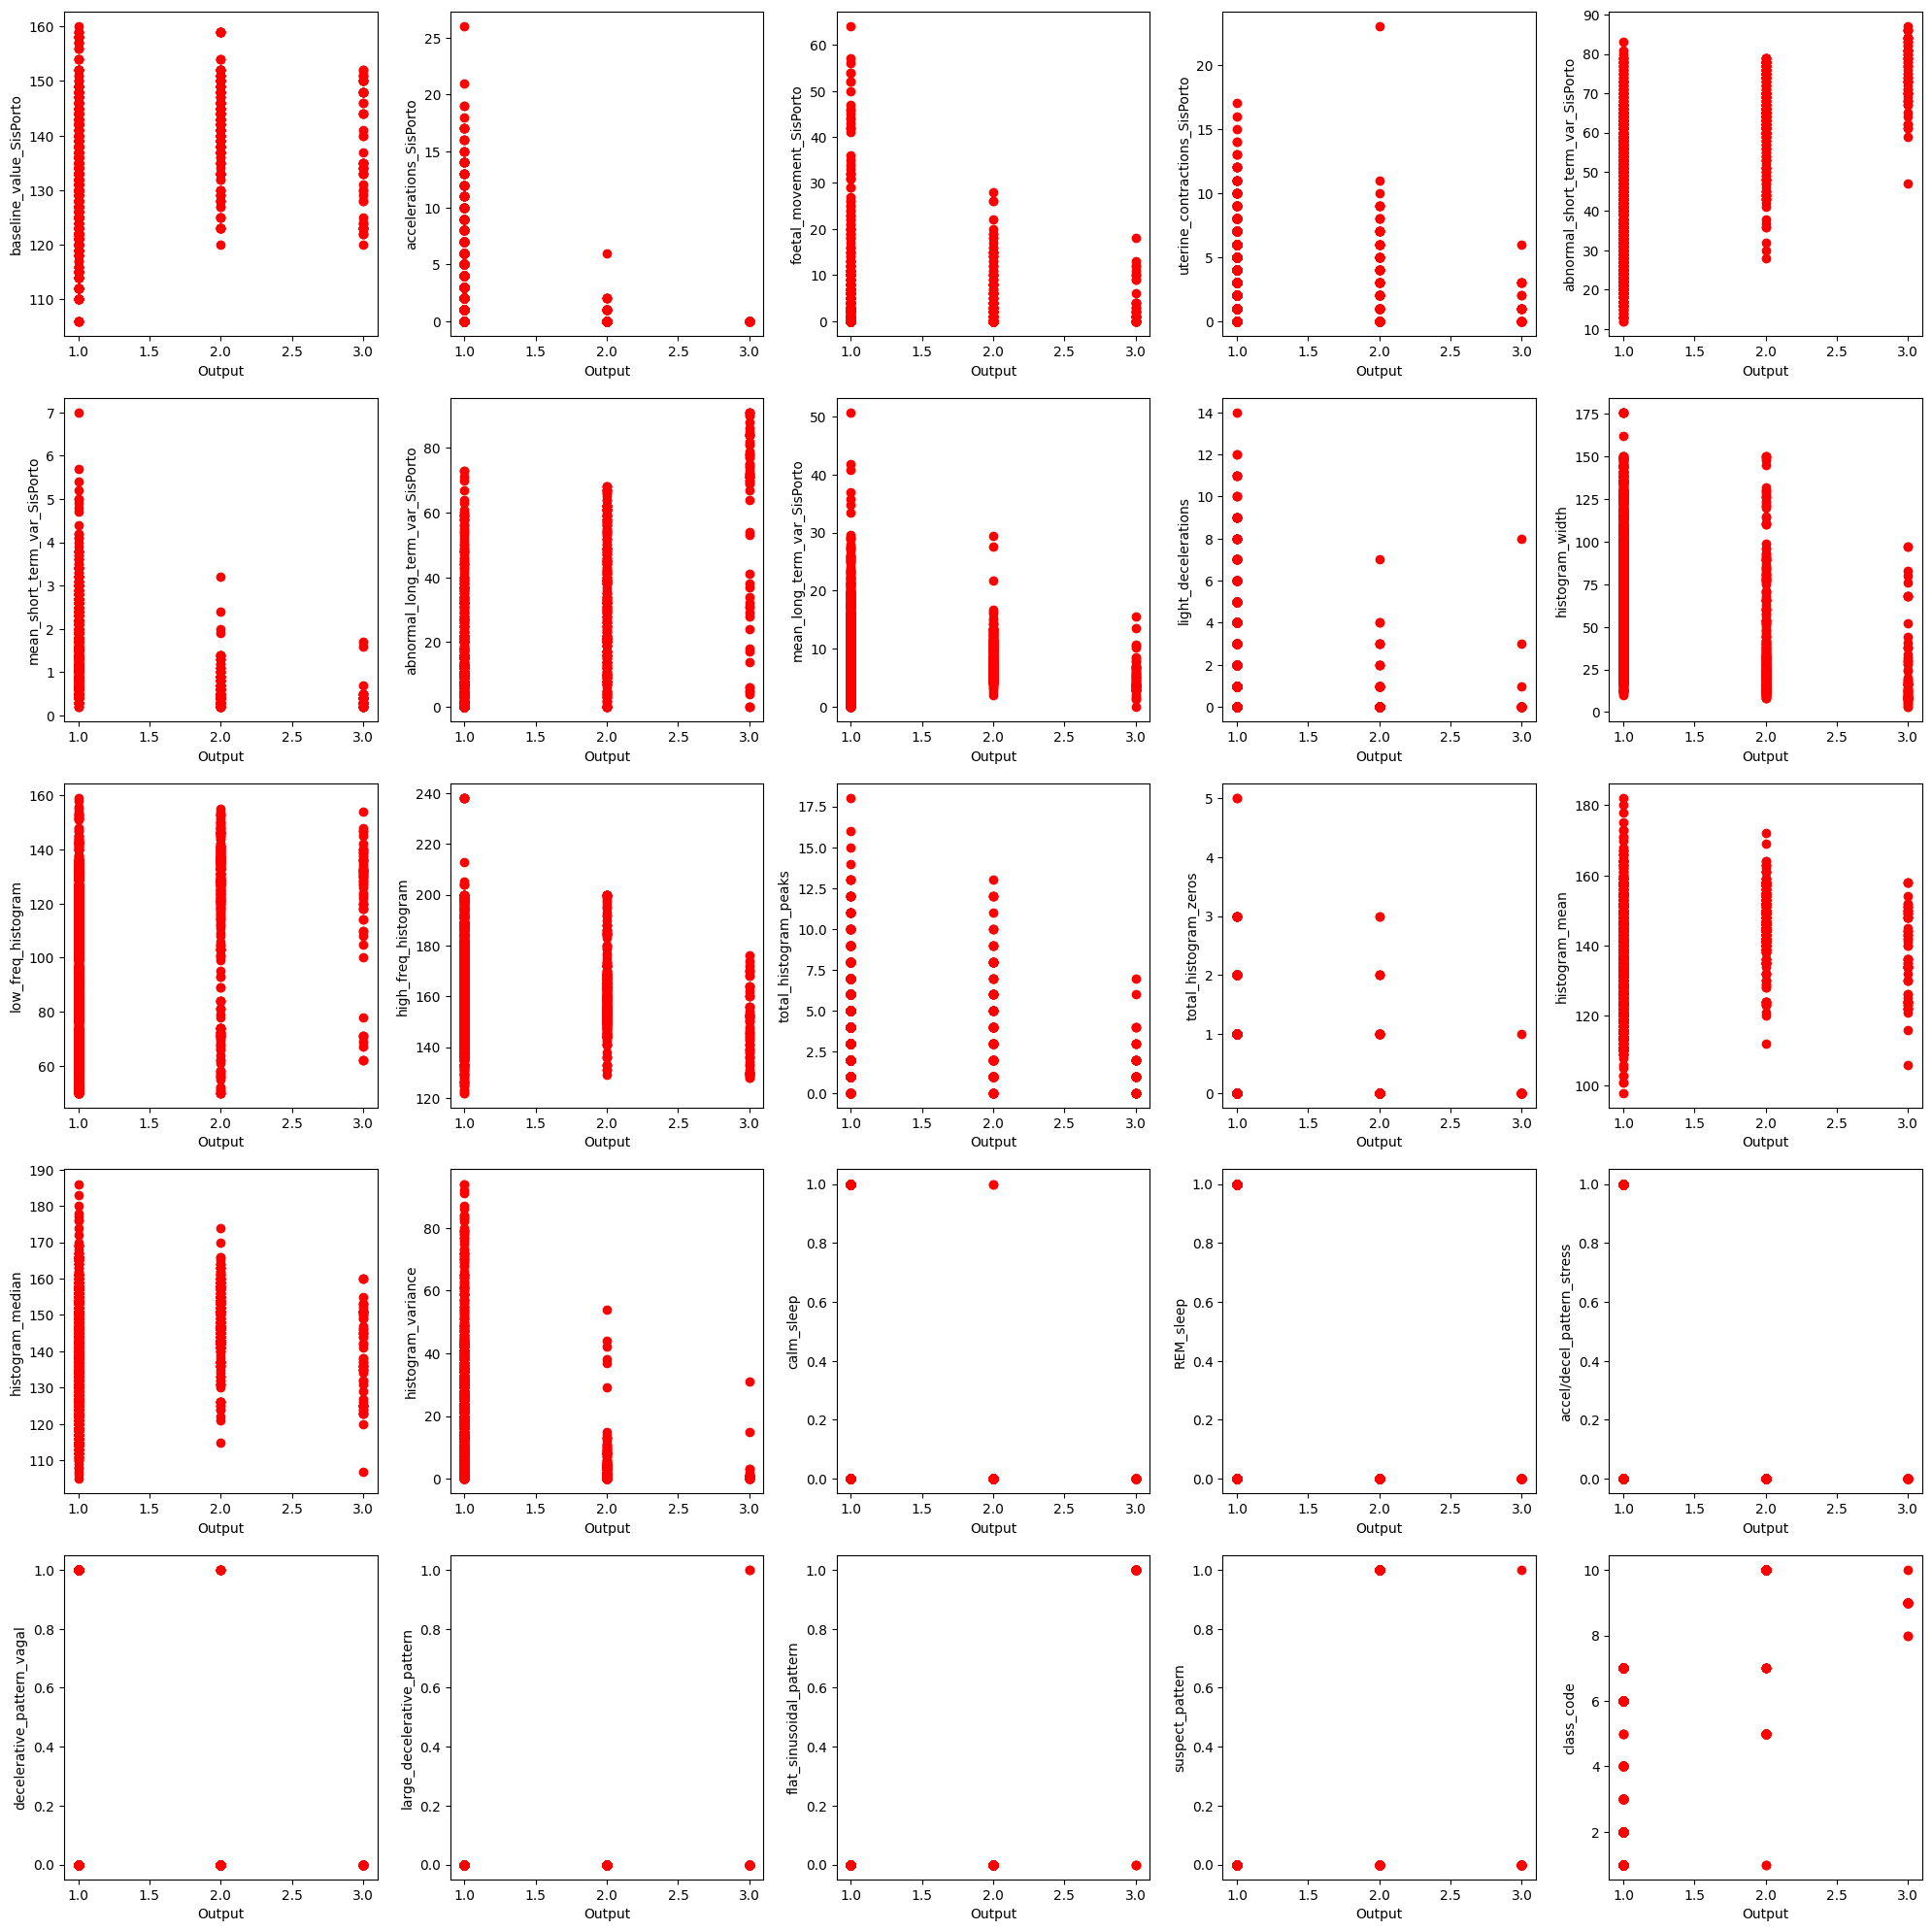

In [ ]:
# Creating Scatter Plots
n1 = 5
n2 = 5
fig, ax = plt.subplots(n1, n2, figsize=(20,20))
col = 0
for i in range(n1):
  for j in range(n2):
    ax[i][j].scatter(y=preprocessed_df.iloc[:, col],x=preprocessed_df['Output'],color='red')
    ax[i][j].set_ylabel(preprocessed_df.columns[col])
    ax[i][j].set_xlabel('Output')
    col+=1

plt.tight_layout()
plt.show()

### Distribution Plots

#### each attribute

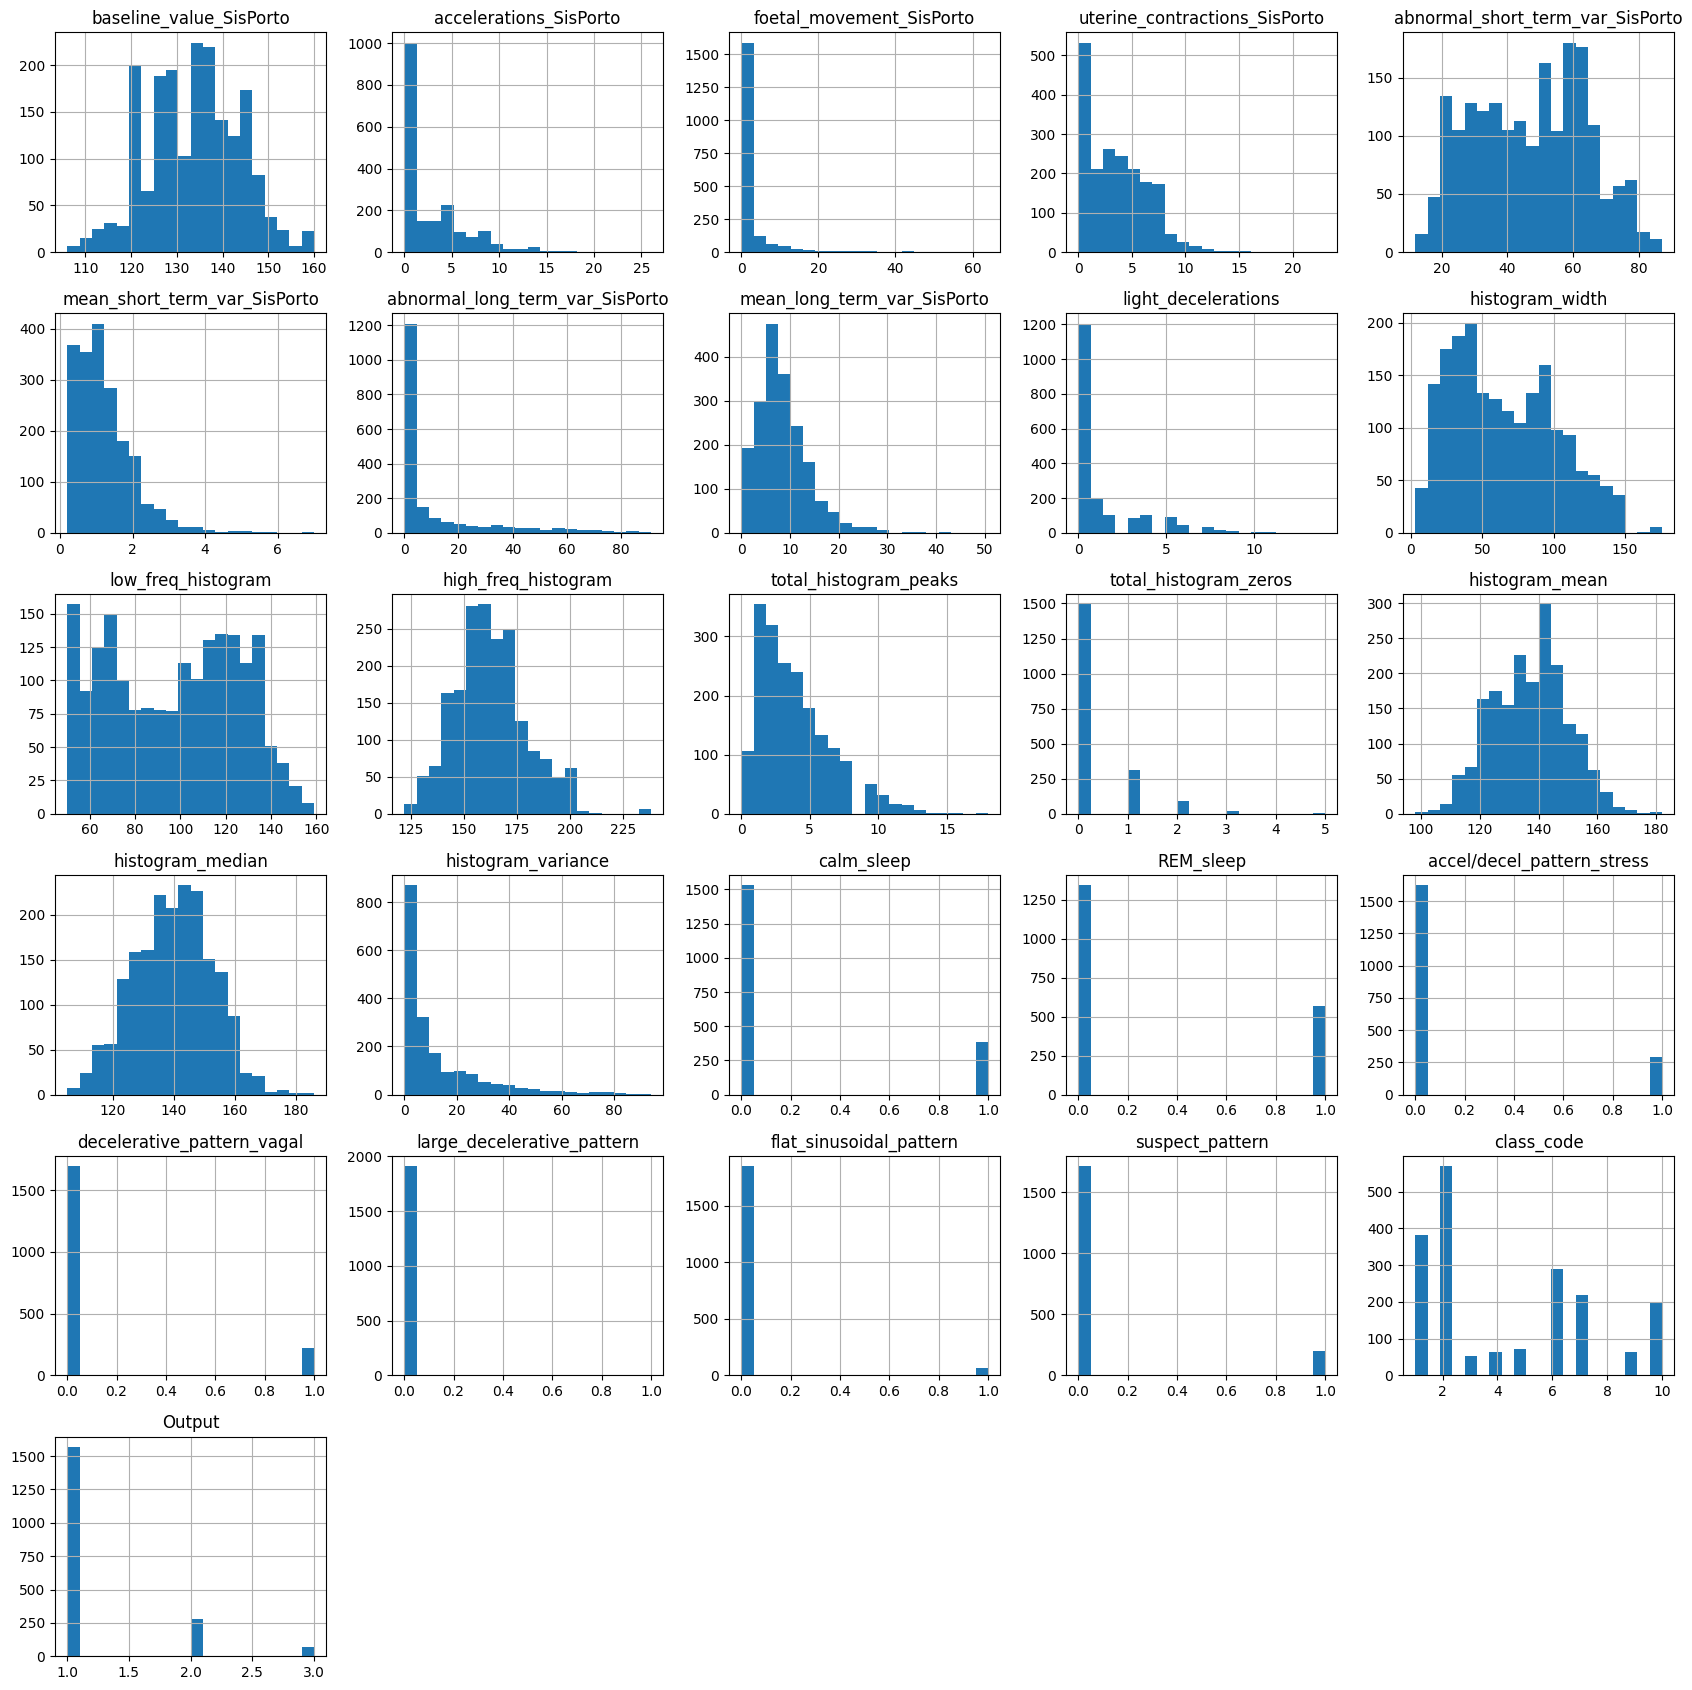

In [ ]:
preprocessed_df.hist(figsize=(17,17), bins=20)
plt.tight_layout()
plt.show()

#### output class imbalance

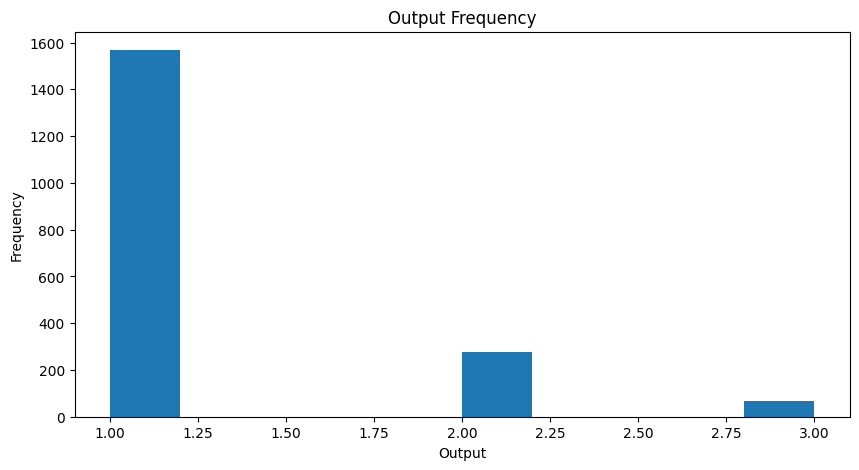

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(preprocessed_df['Output'])
plt.xlabel('Output')
plt.ylabel('Frequency')
plt.title('Output Frequency')
plt.show()

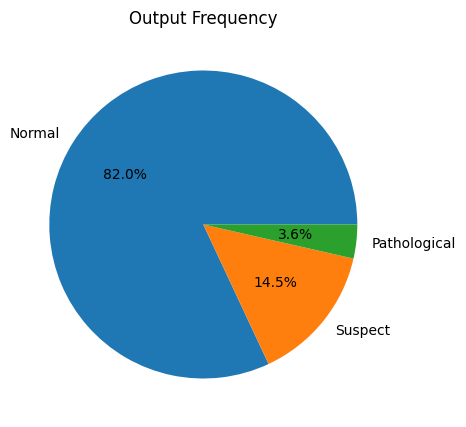

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(preprocessed_df['Output'].value_counts(), labels=['Normal', 'Suspect', 'Pathological'], autopct='%1.1f%%')
plt.title('Output Frequency')
plt.show()

#### Creating distribution plots

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


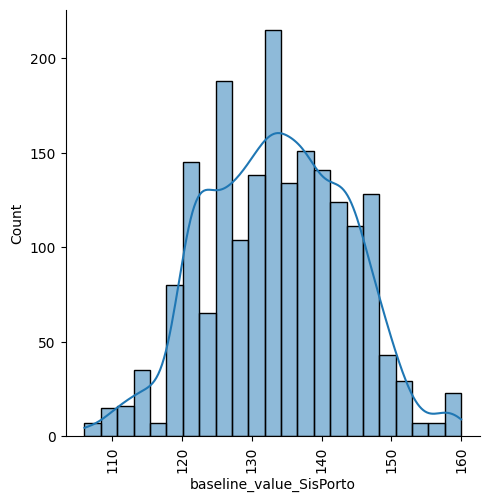

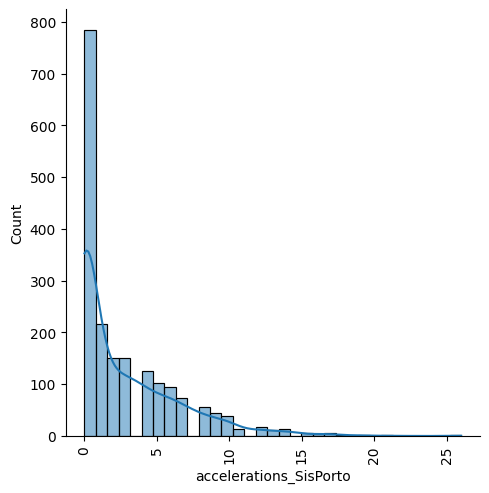

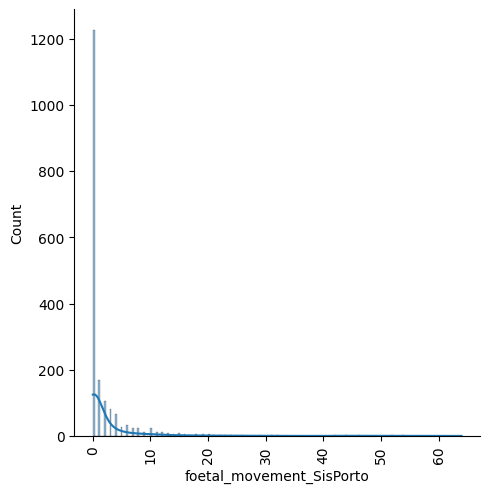

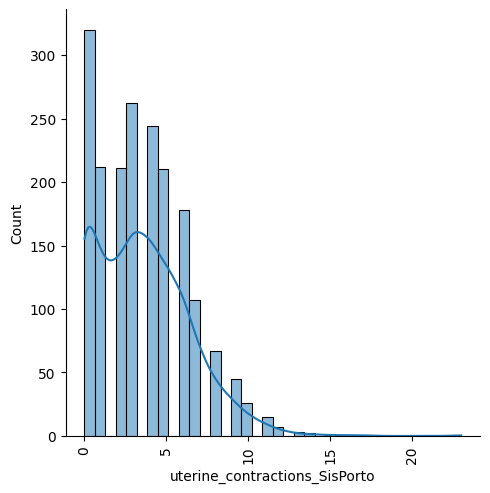

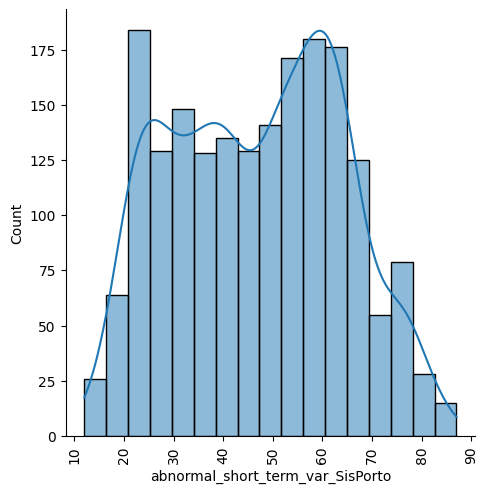

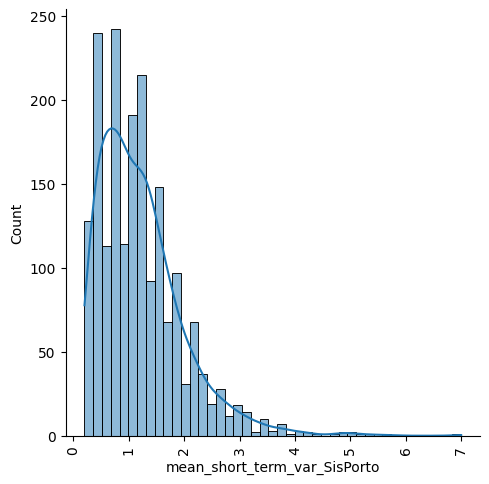

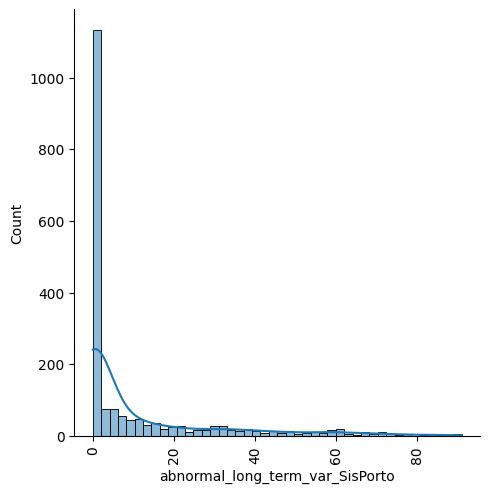

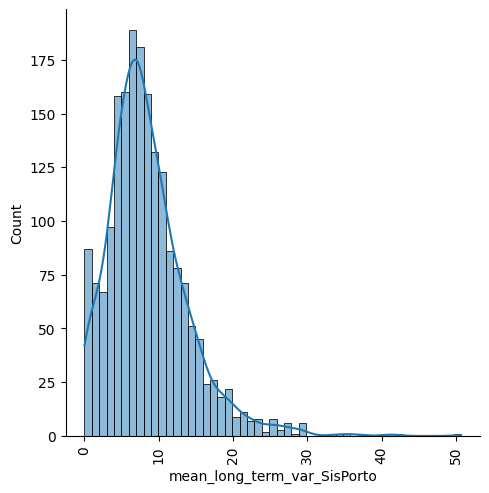

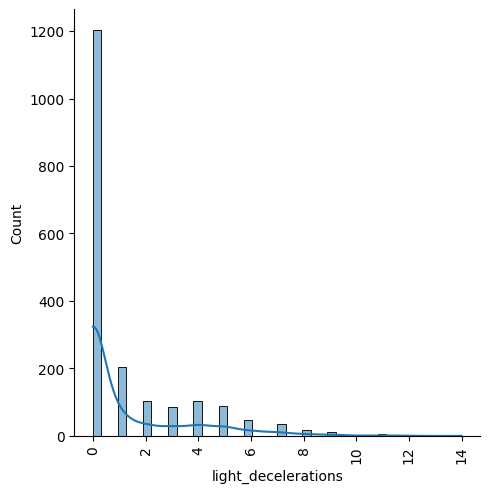

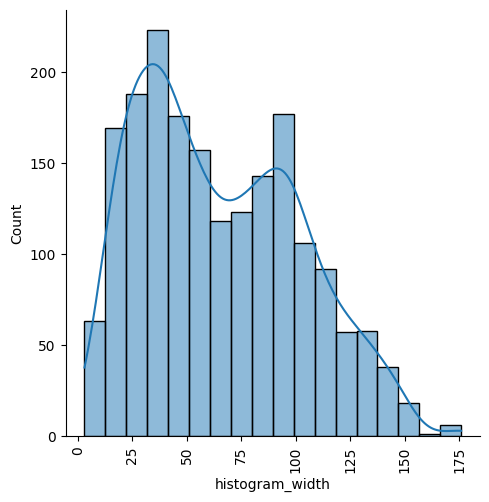

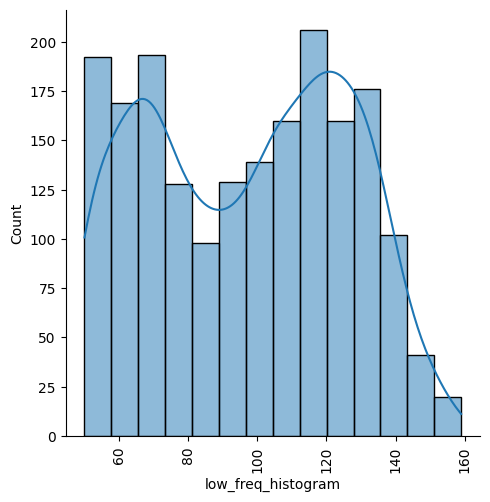

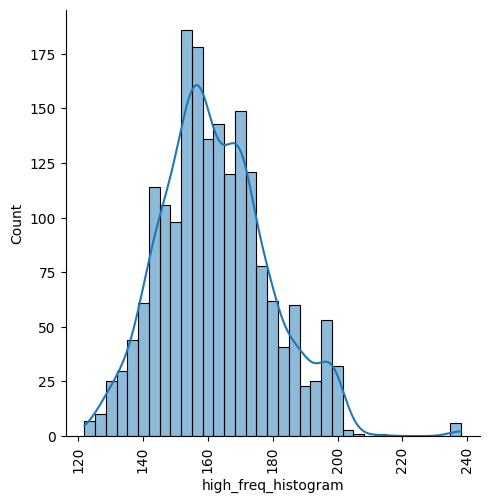

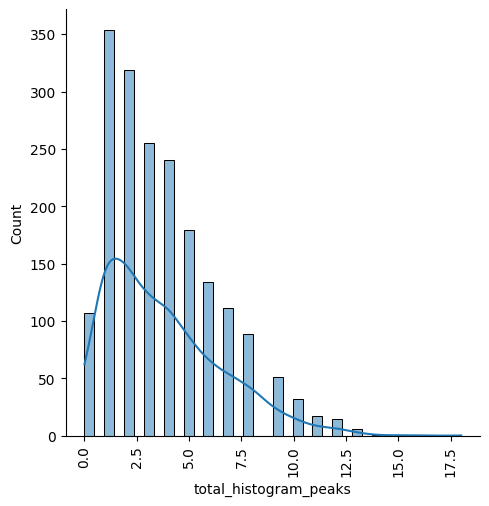

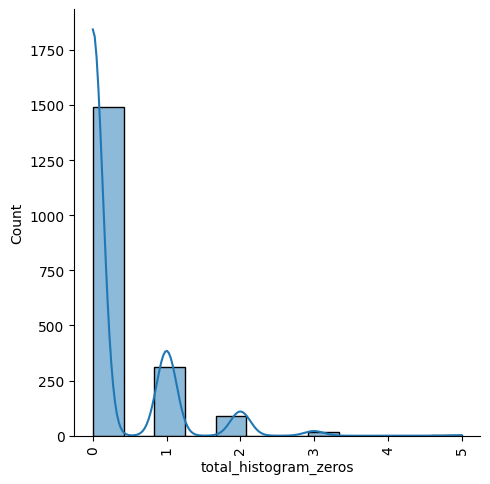

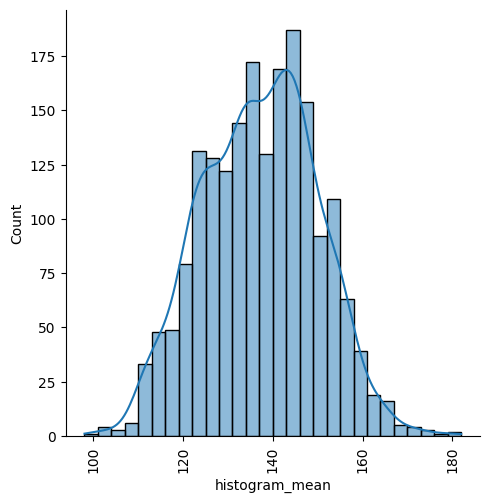

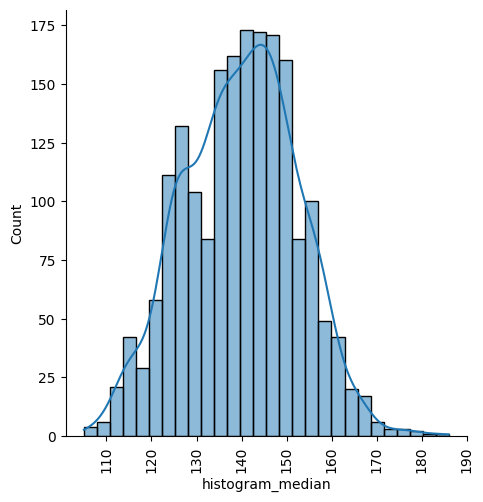

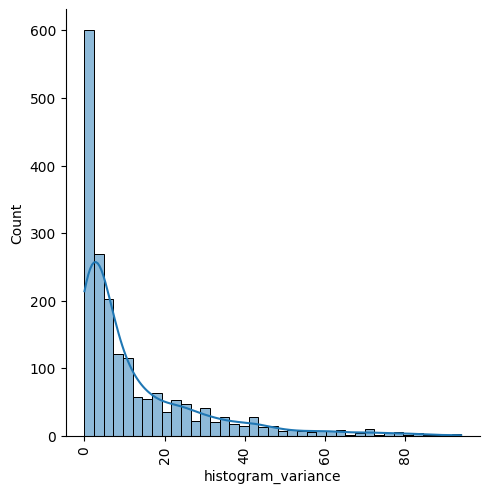

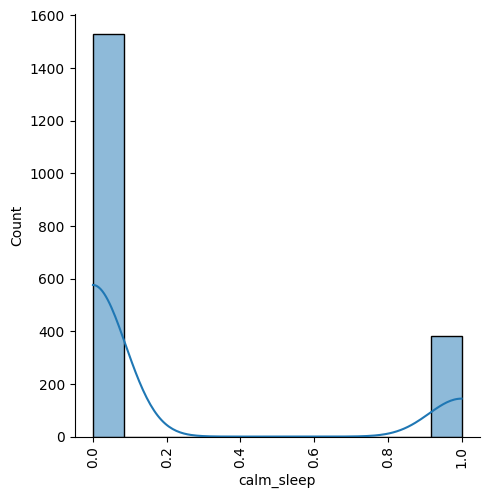

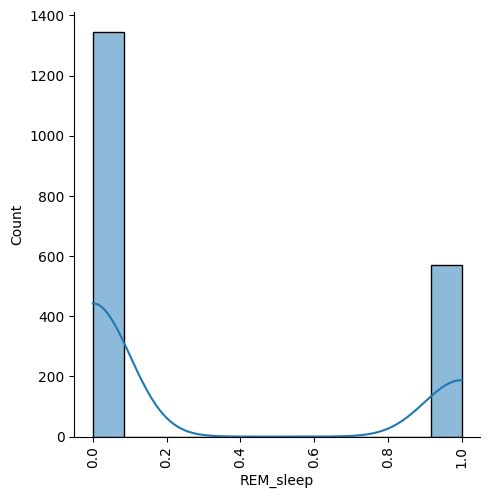

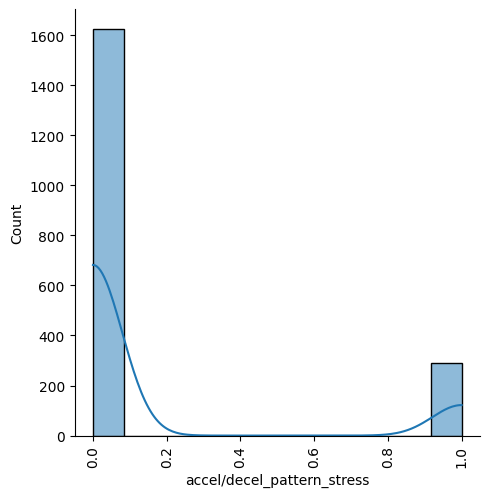

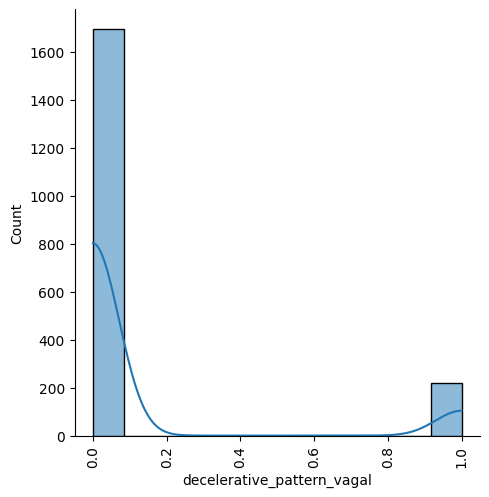

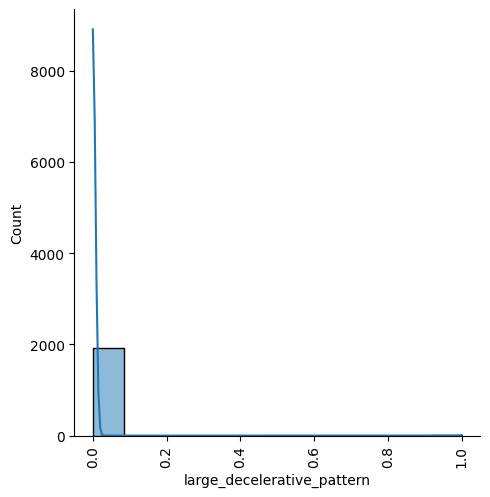

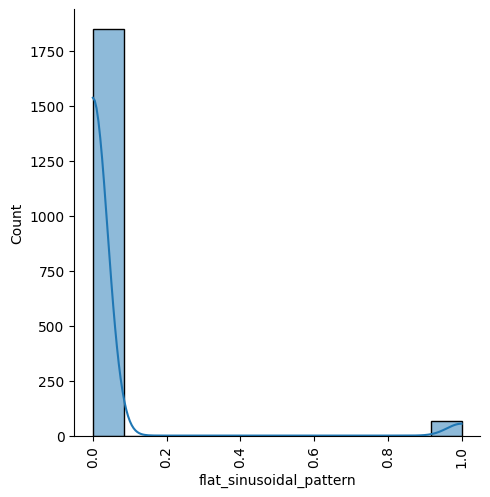

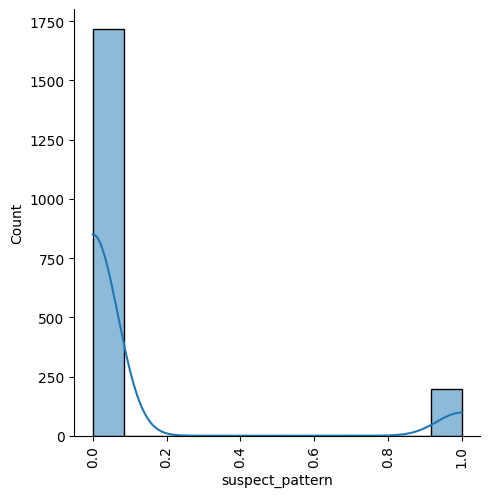

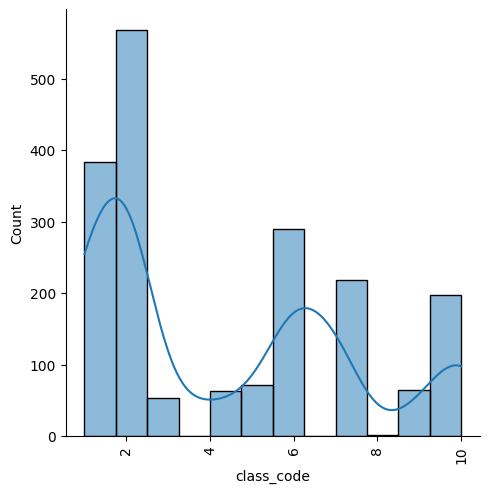

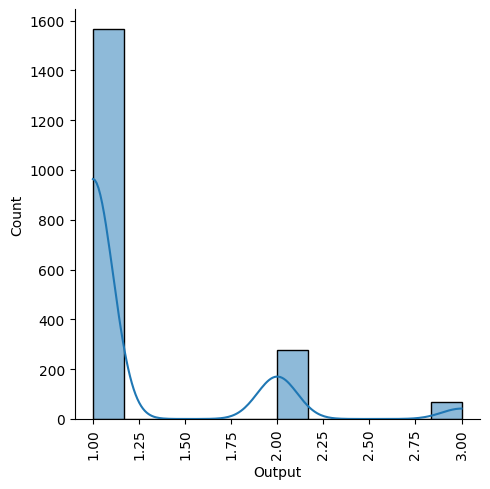

In [ ]:
for i in range(len(preprocessed_df.columns)):
  sns.displot(preprocessed_df.iloc[:, i], kde=True)
  plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## **Resampling**

### *OverSampling*

In [ ]:
# Resampling the dataset using SMOTE

from imblearn.over_sampling import SMOTE

def over_sample(preprocessed_df):
  smote = SMOTE()

  x = preprocessed_df.iloc[:, :-1]
  y = preprocessed_df.iloc[:, -1]

  x, y = smote.fit_resample(x, y)
  return x,y

# y = pd.Series(y)
# values in y after resampling
# pd.Series(y).value_counts()

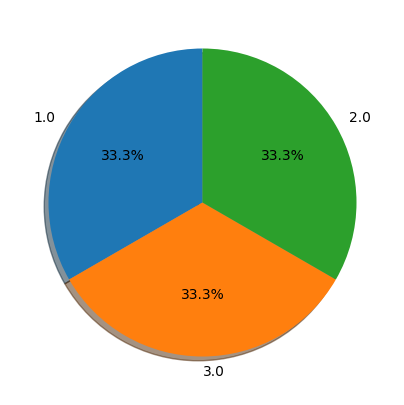

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(y.value_counts(), labels=y.unique(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

### **UnderSampling**

In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X, y = nm.fit_resample(X, y)

# values in y after resampling
pd.Series(y).value_counts()

1.0    176
2.0    176
3.0    176
Name: Output, dtype: int64

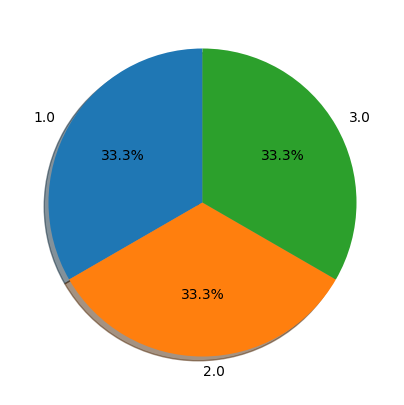

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(y.value_counts(), labels=y.unique(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

# Basic ML Models

## Train:Test Split & Training

In [ ]:
# Implementing ML Models
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def get_train_test_data(df, if_pca=True, n_components=10, test_size=0.2):
    X, y = over_sample(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # Applying PCA

    if if_pca:
        pca = PCA(n_components=n_components)
        pca.fit(X_train)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)

    # Applying Standard Scaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    return X_train, X_test, y_train, y_test

#### Implementing Logistic Regression, SVM, and KNN models

In [ ]:
# 3 Class Classification

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

def run_model(model, X_train, y_train, X_test, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('Train Score:', train_score)
    print('Test Score:', test_score)
    print('Confusion Matrix:\n', confusion_matrix(y_test, model.predict(X_test)))
    print('Classification Report:\n', classification_report(y_test, model.predict(X_test)))
    print('--------------------------------------------------\n')

    return train_score, test_score

def basic_ML_models(df, test_size=0.2, max_iters= 1000, lr = 0.1, if_pca=True, n_components=10):
    X_train, X_test, y_train, y_test = get_train_test_data(df, if_pca, n_components, test_size)
    model_train_scores = dict()
    model_test_scores = dict()

    print('\t\t\t\t\tLogistic Regression')
    model = LogisticRegression(max_iter=max_iters, C=lr, solver='liblinear')
    model.fit(X_train, y_train)
    model_train_scores['Logistic Regression'] , model_test_scores['Logistic Regression'] = run_model(model, X_train, y_train, X_test, y_test)

    # Naive-Bayes
    print('\t\t\t\t\tGaussian Naive-Bayes Classifier')
    model = GaussianNB()
    model.fit(X_train, y_train)
    model_train_scores['Naive Bayes'], model_test_scores['Naive Bayes'] = run_model(model, X_train, y_train, X_test, y_test)

    # KNN

    print('\t\t\t\t\tKNN')

    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    model_train_scores['KNN'], model_test_scores['KNN'] = run_model(model, X_train, y_train, X_test, y_test)

    # SVM

    print('\t\t\t\t\tSVM')

    model = SVC()
    model.fit(X_train, y_train)
    model_train_scores['SVM'], model_test_scores['SVM'] = run_model(model, X_train, y_train, X_test, y_test)

    return model_train_scores, model_test_scores

In [ ]:
# using k-fold stratified cross validation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

def run_model(model, X_train, y_train, X_test, y_test):
    cv_score = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

    print('Train Score:', cv_score.mean())
    print('Test Score:', model.score(X_test, y_test))
    print('Confusion Matrix:\n', confusion_matrix(y_test, model.predict(X_test)))
    print('Classification Report:\n', classification_report(y_test, model.predict(X_test)))
    print('--------------------------------------------------\n')

    return cv_score.mean(), model.score(X_test, y_test)

def basic_ML_models_k_fold(df, test_size=0.2, max_iters= 1000, lr = 0.1, if_pca=False, n_components=10):
    X_train, X_test, y_train, y_test = get_train_test_data(df, if_pca, n_components, test_size)
    model_train_scores = dict()
    model_test_scores = dict()

    # Logistic Regression
    lr = LogisticRegression(max_iter=max_iters, C=lr, solver='liblinear')
    print('\t\t\t\tLogistic Regression')
    model_train_scores['Logistic Regression'], model_test_scores['Logistic Regression'] = run_model(lr, X_train, y_train, X_test, y_test)

    # KNN
    knn = KNeighborsClassifier()
    print('\t\t\t\tKNN')
    model_train_scores['KNN'], model_test_scores['KNN'] = run_model(knn, X_train, y_train, X_test, y_test)

    # SVM
    model = SVC()
    print('\t\t\t\tSVM')
    model_train_scores['SVM'], model_test_scores['SVM'] = run_model(model, X_train, y_train, X_test, y_test)

    return model_train_scores, model_test_scores

## Running the models

### Without PCA

Overfitting happens

In [ ]:
model_train_scores, model_test_scores = basic_ML_models(preprocessed_df, test_size=0.2, max_iters= 1000, lr = 0.1, if_pca=False, n_components=10)

					Logistic Regression
Train Score: 0.9906989104437949
Test Score: 0.9946865037194474
Confusion Matrix:
 [[320   4   0]
 [  1 303   0]
 [  0   0 313]]
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      0.99      0.99       324
         2.0       0.99      1.00      0.99       304
         3.0       1.00      1.00      1.00       313

    accuracy                           0.99       941
   macro avg       0.99      0.99      0.99       941
weighted avg       0.99      0.99      0.99       941

--------------------------------------------------

					Gaussian Naive-Bayes Classifier
Train Score: 0.9808663300558066
Test Score: 0.9851222104144527
Confusion Matrix:
 [[320   4   0]
 [ 10 294   0]
 [  0   0 313]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       324
         2.0       0.99      0.97      0.98       304
         3.0       1.00      1.00     

### With PCA
   Reduces Overfitting

In [ ]:
model_train_scores, model_test_scores = basic_ML_models(preprocessed_df, test_size=0.2, max_iters= 1000, lr = 0.1, if_pca=True, n_components=5)

					Logistic Regression
Train Score: 0.7884666489503056
Test Score: 0.7917109458023379
Confusion Matrix:
 [[256  33   8]
 [ 35 204  66]
 [  9  45 285]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.85      0.86      0.86       297
         2.0       0.72      0.67      0.70       305
         3.0       0.79      0.84      0.82       339

    accuracy                           0.79       941
   macro avg       0.79      0.79      0.79       941
weighted avg       0.79      0.79      0.79       941

--------------------------------------------------

					Gaussian Naive-Bayes Classifier
Train Score: 0.7079457879351582
Test Score: 0.7279489904357067
Confusion Matrix:
 [[219  67  11]
 [ 37 192  76]
 [ 20  45 274]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.79      0.74      0.76       297
         2.0       0.63      0.63      0.63       305
         3.0       0.76      0.81     

### K-Fold Cross Validation

In [ ]:
model_train_scores, model_test_scores = basic_ML_models_k_fold(preprocessed_df, test_size=0.2, max_iters= 1000, lr = 0.1, if_pca=True, n_components=5)

				Logistic Regression
Train Score: 0.877124183006536


NotFittedError: ignored

## Decision Trees

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def decision_tree(df, test_size=0.2, if_pca=False, n_components=10):
    X_train, X_test, y_train, y_test = get_train_test_data(df, if_pca, n_components, test_size)
    model_train_scores = dict()
    model_test_scores = dict()

    # Decision Tree
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    model_train_scores['Decision Tree'] = model.score(X_train, y_train)
    model_test_scores['Decision Tree'] = model.score(X_test, y_test)

    print('Decision Tree')
    print('Train Score:', model_train_scores['Decision Tree'])
    print('Test Score:', model_test_scores['Decision Tree'])
    print('Confusion Matrix:\n', confusion_matrix(y_test, model.predict(X_test)))
    print('Classification Report:\n', classification_report(y_test, model.predict(X_test)))
    print('--------------------------------------------------\n')

    # Decision Tree with Pruning

    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 3, 4, 5, 6, 7, 8],
        'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
        'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]
    }

    model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
    model.fit(X_train, y_train)
    model_train_scores['Decision Tree with Pruning'] = model.score(X_train, y_train)
    model_test_scores['Decision Tree with Pruning'] = model.score(X_test, y_test)

    print('Decision Tree with Pruning')
    print('Train Score:', model_train_scores['Decision Tree with Pruning'])
    print('Test Score:', model_test_scores['Decision Tree with Pruning'])
    print('Best Parameters:', model.best_params_)
    print('Confusion Matrix:\n', confusion_matrix(y_test, model.predict(X_test)))
    print('Classification Report:\n', classification_report(y_test, model.predict(X_test)))
    print('--------------------------------------------------\n')

    return model_train_scores, model_test_scores

In [ ]:
# Calling decision_tree

model_train_scores, model_test_scores = decision_tree(preprocessed_df, test_size=0.2, if_pca=False, n_components=10)

Decision Tree
Train Score: 1.0
Test Score: 0.9946865037194474
Confusion Matrix:
 [[305   1   0]
 [  3 307   0]
 [  0   1 324]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.99      1.00      0.99       306
         2.0       0.99      0.99      0.99       310
         3.0       1.00      1.00      1.00       325

    accuracy                           0.99       941
   macro avg       0.99      0.99      0.99       941
weighted avg       0.99      0.99      0.99       941

--------------------------------------------------

Decision Tree with Pruning
Train Score: 0.9986712729205421
Test Score: 0.997874601487779
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Confusion Matrix:
 [[305   1   0]
 [  1 309   0]
 [  0   0 325]]
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       306
         2.0       1.00 

In [ ]:
# Calling decision_tree

model_train_scores, model_test_scores = decision_tree(preprocessed_df, test_size=0.25, if_pca=True, n_components=10)

Decision Tree
Train Score: 1.0
Test Score: 0.95578231292517
Confusion Matrix:
 [[374  18   2]
 [ 16 363   8]
 [  1   7 387]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.95      0.95       394
         2.0       0.94      0.94      0.94       387
         3.0       0.97      0.98      0.98       395

    accuracy                           0.96      1176
   macro avg       0.96      0.96      0.96      1176
weighted avg       0.96      0.96      0.96      1176

--------------------------------------------------

Decision Tree with Pruning
Train Score: 0.9733560090702947
Test Score: 0.9319727891156463
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3}
Confusion Matrix:
 [[372  21   1]
 [ 27 347  13]
 [  4  14 377]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.92      0.94      0.93       394
         2.0       0.91     

In [ ]:
# Implementing decision tree with pre-pruning and post-pruning

from sklearn.tree import DecisionTreeClassifier

def decision_tree_pruning(df, test_size=0.2, if_pca=False, n_components=10):
    X_train, X_test, y_train, y_test = get_train_test_data(df, if_pca, n_components, test_size)
    model_train_scores = dict()
    model_test_scores = dict()

    # Decision Tree with Pre-Pruning

    model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)
    model.fit(X_train, y_train)
    model_train_scores['Decision Tree with Pre-Pruning'] = model.score(X_train, y_train)
    model_test_scores['Decision Tree with Pre-Pruning'] = model.score(X_test, y_test)

    print('Decision Tree with Pre-Pruning')
    print('Train Score:', model_train_scores['Decision Tree with Pre-Pruning'])
    print('Test Score:', model_test_scores['Decision Tree with Pre-Pruning'])
    print('Confusion Matrix:\n', confusion_matrix(y_test, model.predict(X_test)))
    print('Classification Report:\n', classification_report(y_test, model.predict(X_test)))
    print('--------------------------------------------------\n')

    # Decision Tree with Post-Pruning

    model = DecisionTreeClassifier()
    path = model.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    models = []
    for ccp_alpha in ccp_alphas:
        model = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
        model.fit(X_train, y_train)
        models.append(model)
    train_scores = [model.score(X_train, y_train) for model in models]
    test_scores = [model.score(X_test, y_test) for model in models]

    model = DecisionTreeClassifier(ccp_alpha=ccp_alphas[np.argmax(test_scores)])
    model.fit(X_train, y_train)
    model_train_scores['Decision Tree with Post-Pruning'] = model.score(X_train, y_train)
    model_test_scores['Decision Tree with Post-Pruning'] = model.score(X_test, y_test)

    print('Decision Tree with Post-Pruning')
    print('Train Score:', model_train_scores['Decision Tree with Post-Pruning'])
    print('Test Score:', model_test_scores['Decision Tree with Post-Pruning'])
    print('Best Alpha:', ccp_alphas[np.argmax(test_scores)])
    print('Confusion Matrix:\n', confusion_matrix(y_test, model.predict(X_test)))
    print('Classification Report:\n', classification_report(y_test, model.predict(X_test)))
    print('--------------------------------------------------\n')

    return model_train_scores, model_test_scores

In [ ]:
# Calling decision_tree_pruning

model_train_scores, model_test_scores = decision_tree_pruning(preprocessed_df, test_size=0.2, if_pca=False, n_components=10)

Decision Tree with Pre-Pruning
Train Score: 0.9725490196078431
Test Score: 0.9451697127937336
Confusion Matrix:
 [[303   9   0]
 [ 12  42   0]
 [  0   0  17]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.97      0.97       312
         2.0       0.82      0.78      0.80        54
         3.0       1.00      1.00      1.00        17

    accuracy                           0.95       383
   macro avg       0.93      0.92      0.92       383
weighted avg       0.94      0.95      0.94       383

--------------------------------------------------

Decision Tree with Post-Pruning
Train Score: 0.9986928104575163
Test Score: 0.9712793733681462
Best Alpha: 0.0004348239642357336
Confusion Matrix:
 [[308   4   0]
 [  7  47   0]
 [  0   0  17]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.99      0.98       312
         2.0       0.92      0.87      0.90        54
   

In [ ]:
# Calling decision_tree_pruning

model_train_scores, model_test_scores = decision_tree_pruning(preprocessed_df, test_size=0.2, if_pca=True, n_components=10)

Decision Tree with Pre-Pruning
Train Score: 0.9
Test Score: 0.8590078328981723
Confusion Matrix:
 [[302   8   2]
 [ 33  20   1]
 [  7   3   7]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.88      0.97      0.92       312
         2.0       0.65      0.37      0.47        54
         3.0       0.70      0.41      0.52        17

    accuracy                           0.86       383
   macro avg       0.74      0.58      0.64       383
weighted avg       0.84      0.86      0.84       383

--------------------------------------------------

Decision Tree with Post-Pruning
Train Score: 0.9986928104575163
Test Score: 0.8772845953002611
Best Alpha: 0.0006191950464396288
Confusion Matrix:
 [[291  17   4]
 [ 17  36   1]
 [  1   7   9]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.93      0.94       312
         2.0       0.60      0.67      0.63        54
         3.0      

### **Observations**

* We can observe, that with 27 features, the data overfits the model and gives an
accuracy of ~99% even with a very low training set.
* Once we implement PCA, and select the most deciding components/features, it helps us in reducing the overfitting.
* Here, we are also using regularization, indicated by *solver = 'liblinear'*, which is L2, L1 regularization.
* Thus, we can observe that using these techniques, we successfully reduce the model overfitting and make it closer to real-world prediction scenario.

#### Using AutoML to verify our findings

In [ ]:
!pip install tpot

In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

train_X, test_X, train_y, test_y = get_train_test_data(preprocessed_df, if_pca=True, n_components=10)

# define model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
model = TPOTClassifier(generations=5, population_size=50, cv=5, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# perform the search
model.fit(train_X, train_y)
# export the best model
model.export('tpot_best_model.py')

y_pred_tpot = model.predict(test_X)

print('TPOT')
print('Train Score:', model.score(train_X, train_y))
print('Test Score:', model.score(test_X, test_y))
print('Confusion Matrix:', confusion_matrix(test_y, y_pred_tpot))
print('Classification Report:', classification_report(test_y, y_pred_tpot))